## Coral Reef Bleaching In South East Asia Project
---

### Content that will be covered
---
1. Data Pre-processing ( Data Analysis + Data EDA + Data Cleaning )
2. Model Training
3. Hyperparameter tuning for models used
4. Evaluation of best model from results
5. Analysis and Improvement Plan

### Data Dictionary
---
### Global Bleaching Environmental:
#### https://www.kaggle.com/datasets/pnminh95/global-bleaching-environmental

#### Includes 41.4K rows + 17 Columns

#### Problem Statement: Coral bleaching threatens South East Asia's rich marine biodiversity, but current prediction models are insufficiently dynamic and lack real-time data integration. This limits timely conservation actions. An improved predictive model using IoT sensors and machine learning can predict bleaching risks more accurately, enabling proactive measures to protect coral reefs and enhance marine biodiversity.

## 1.  Early Data Exploration And Pre-Processing
---

<b> Importing Respective Modules

In [1]:
# Load libraries
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#Model selection is the process of selecting one final machine learning model 
#from among a collection of candidate machine learning models for a training dataset.
from sklearn import model_selection

#Ignore all warnings provided by Jupyter notebook
import warnings
warnings.filterwarnings('ignore')

<b> Importing Dataset into a dataframe

In [2]:
df = pd.read_csv("coral_whole.csv")

### Early Data Exploration
---

<b> Dataset shape

In [3]:
df.shape

(41361, 18)

<b> Dataset size

In [4]:
print(df.size)

744498


<b> DataFrame information

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41361 entries, 0 to 41360
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sample_ID            41361 non-null  int64  
 1   Cyclone_Frequency    41361 non-null  float64
 2   Depth_m              39562 non-null  float64
 3   ClimSST              41248 non-null  float64
 4   Ocean_Name           41361 non-null  object 
 5   Country_Name         41360 non-null  object 
 6   Distance_to_Shore    41359 non-null  float64
 7   Exposure             41361 non-null  object 
 8   Turbidity            41355 non-null  float64
 9   Date_Year            41361 non-null  int64  
 10  Bleaching_Level      41361 non-null  object 
 11  Temperature_Maximum  41229 non-null  float64
 12  SSTA                 41213 non-null  float64
 13  TSA                  41213 non-null  float64
 14  Percent_Bleaching    34515 non-null  float64
 15  Temperature_Mean     41229 non-null 

<b> Dataset unique values

In [6]:
df.nunique()

Sample_ID              27005
Cyclone_Frequency       1747
Depth_m                  465
ClimSST                  982
Ocean_Name                 5
Country_Name              90
Distance_to_Shore      12081
Exposure                   3
Turbidity               1503
Date_Year                 39
Bleaching_Level            2
Temperature_Maximum      673
SSTA                     630
TSA                     1065
Percent_Bleaching       2240
Temperature_Mean         776
Realm_Name                 9
Percent_Cover            359
dtype: int64

<b> Identified Columns

In [7]:
## Columns in the dataset

list(df.columns)

['Sample_ID',
 'Cyclone_Frequency',
 'Depth_m',
 'ClimSST',
 'Ocean_Name',
 'Country_Name',
 'Distance_to_Shore',
 'Exposure',
 'Turbidity',
 'Date_Year',
 'Bleaching_Level',
 'Temperature_Maximum',
 'SSTA',
 'TSA',
 'Percent_Bleaching',
 'Temperature_Mean',
 'Realm_Name',
 'Percent_Cover']

### Data Dictionary for Columns
---
1. Sample_ID : Unique identifier for each sampling event of corals.
2. Cyclone_Frequency : Frequency of cyclones affecting the site, recorded over a 50-year period (1964-2014).
3. Depth_m : Depth at which the sampling took place, affecting light availability and water temperature.
4. ClimSST : Sea surface temperature (in Kelvin) for oceanographic analysis.
5. Ocean_Name : Ocean name where reef site is located, used for regional analysis
6. Country_Name : Country in which the sampling site is located, for geopolitical context. ( USING THIS TO FILTER FOR SEA COUNTRIES)
7. Distance_to_Shore : Distance from shore, influencing exposure to human impacts.
8. Exposure Turbidity : Classification of the site’s exposure to wave action and wind, critical for assessing environmental stress.
9. Date_Year : Sampling years for analyzing long-term trends
10. Bleaching_Level : Coral bleaching severity classification for impact assessment.
11. Temperature_Maximum : Maximum sea surface temperature during sampling.
12. SSTA : Weekly SST deviation from climatology, indicating thermal stress
13. TSA : Weekly SST deviation from maximum climatology, highlighting extreme heat
14. Percent_Bleaching : Average bleaching percentage across transects **( Predicting This )**
15. Temperature_Mean : Mean sea surface temperature during sampling.
16. Realm_Name : Ecological realm classification (Marine Ecoregions of the World).
17. Percent_Cover : Percentage of the substrate covered by coral, indicating reef health. 
18. Temperature_Minimum: Minimum sea surface temperature recorded, indicating the lower thermal threshold.

### Filtering Data to Focus on Southeast Asian (SEA) Countries
---

In [8]:
# List of Southeast Asian (SEA) countries
sea_countries = ["Brunei", "Cambodia", "Indonesia", "Laos", "Malaysia", "Myanmar", "Philippines", "Singapore", 
                 "Thailand", "Timor-Leste", "Vietnam"]

# Filter the dataset to include only SEA countries ( Since we are predicting coral bleaching percentages in SEA )
corals_df = df[df['Country_Name'].isin(sea_countries)]

In [9]:
#This code will provide the unique count for my selected column, "Country name".
corals_df["Country_Name"].value_counts()

Country_Name
Malaysia       4581
Indonesia      2923
Philippines    1911
Vietnam        1390
Thailand        655
Cambodia        221
Brunei          109
Myanmar          64
Singapore         2
Name: count, dtype: int64

### Sanity check of data (Coral Bleaching within SEA countries)
---

In [10]:
corals_df.head()

,Sample_ID,Cyclone_Frequency,Depth_m,ClimSST,Ocean_Name,Country_Name,Distance_to_Shore,Exposure,Turbidity,Date_Year,Bleaching_Level,Temperature_Maximum,SSTA,TSA,Percent_Bleaching,Temperature_Mean,Realm_Name,Percent_Cover
65,10324937,47.39,NaN,300.76,Pacific,Indonesia,301.90,Exposed,0.0849,2010,Colony,305.44,0.10,-0.72,55.0,301.71,Central Indo-Pacific,NaN
66,10324938,47.39,NaN,300.67,Pacific,Indonesia,194.45,Exposed,0.0442,2010,Colony,305.45,0.12,-0.69,55.0,301.61,Central Indo-Pacific,NaN
67,10324939,47.39,NaN,300.66,Pacific,Indonesia,51.85,Exposed,0.0849,2010,Colony,305.47,0.19,-0.65,55.0,301.59,Central Indo-Pacific,NaN
164,10323982,49.88,7.0,301.83,Pacific,Cambodia,180.45,Sheltered,0.1265,2010,Colony,307.01,1.78,1.06,60.0,302.23,Central Indo-Pacific,NaN
175,10324921,48.78,NaN,302.62,Indian,Indonesia,1013.58,Sheltered,0.0444,2010,Colony,305.58,1.13,1.09,60.0,302.05,Central Indo-Pacific,NaN


### Describing Dataset for EDA

In [11]:
corals_df.describe()

,Sample_ID,Cyclone_Frequency,Depth_m,ClimSST,Distance_to_Shore,Turbidity,Date_Year,Temperature_Maximum,SSTA,TSA,Percent_Bleaching,Temperature_Mean,Percent_Cover
count,1.185600e+04,11856.000000,11732.000000,11804.000000,11856.000000,11854.000000,11856.000000,11797.000000,11789.000000,11789.000000,9097.000000,11797.000000,11596.000000
mean,1.031224e+07,51.261858,6.727135,296.344674,1695.584739,0.068393,2009.799258,305.808046,0.223923,-0.545682,3.566288,301.755855,19.981375
std,4.749113e+03,3.202382,2.905294,14.115257,6000.168151,0.058140,6.348279,0.952456,0.834999,1.147195,12.581376,0.745404,22.633359
min,1.029043e+07,23.070000,1.000000,262.150000,3.210000,0.000000,1983.000000,303.450000,-2.830000,-6.950000,0.000000,297.420000,0.000000
25%,1.030910e+07,49.370000,4.500000,300.970000,91.720000,0.044200,2005.000000,305.310000,-0.300000,-1.260000,0.000000,301.580000,0.620000
50%,1.031094e+07,49.880000,6.000000,302.120000,213.345000,0.060200,2010.000000,305.660000,0.210000,-0.500000,0.000000,301.860000,10.000000
75%,1.031283e+07,54.370000,9.000000,302.700000,701.477500,0.084900,2016.000000,306.200000,0.750000,0.250000,0.750000,302.220000,35.620000
max,1.033171e+07,64.630000,28.000000,304.110000,162082.330000,1.143400,2020.000000,313.140000,3.310000,3.270000,100.000000,303.520000,93.750000


### Check data types of columns to ensure it is correct

In [12]:
print(corals_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 11856 entries, 65 to 41360
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sample_ID            11856 non-null  int64  
 1   Cyclone_Frequency    11856 non-null  float64
 2   Depth_m              11732 non-null  float64
 3   ClimSST              11804 non-null  float64
 4   Ocean_Name           11856 non-null  object 
 5   Country_Name         11856 non-null  object 
 6   Distance_to_Shore    11856 non-null  float64
 7   Exposure             11856 non-null  object 
 8   Turbidity            11854 non-null  float64
 9   Date_Year            11856 non-null  int64  
 10  Bleaching_Level      11856 non-null  object 
 11  Temperature_Maximum  11797 non-null  float64
 12  SSTA                 11789 non-null  float64
 13  TSA                  11789 non-null  float64
 14  Percent_Bleaching    9097 non-null   float64
 15  Temperature_Mean     11797 non-null  flo

### Looking for Unique Values in Dataset

In [13]:
corals_df.nunique()

Sample_ID              6080
Cyclone_Frequency       411
Depth_m                 139
ClimSST                 422
Ocean_Name                2
Country_Name              9
Distance_to_Shore      2326
Exposure                  3
Turbidity               609
Date_Year                29
Bleaching_Level           2
Temperature_Maximum     277
SSTA                    442
TSA                     547
Percent_Bleaching       205
Temperature_Mean        277
Realm_Name                2
Percent_Cover           189
dtype: int64

### Checking for duplicates

In [14]:
# Check for duplicate rows and count them
duplicate_counts = corals_df.duplicated().value_counts()
print(duplicate_counts)

False    11807
True        49
Name: count, dtype: int64


### Checking for null values

In [15]:
### Check for null values using isna and sum to find which columns have null values
na_counts = corals_df.isna().sum()
print(na_counts)

Sample_ID                 0
Cyclone_Frequency         0
Depth_m                 124
ClimSST                  52
Ocean_Name                0
Country_Name              0
Distance_to_Shore         0
Exposure                  0
Turbidity                 2
Date_Year                 0
Bleaching_Level           0
Temperature_Maximum      59
SSTA                     67
TSA                      67
Percent_Bleaching      2759
Temperature_Mean         59
Realm_Name                0
Percent_Cover           260
dtype: int64


### Analysis of Dataset before treatement
---

<b> Summary

1. Some columns are missing data which leads to null values, hence we must remove null values
2. Some rows are also duplicated, which can lead to usage of more processing power and also skew results of the model, leading to less accurate results.

### Pre-processing data treatments
---

In [16]:
corals_df.head()

,Sample_ID,Cyclone_Frequency,Depth_m,ClimSST,Ocean_Name,Country_Name,Distance_to_Shore,Exposure,Turbidity,Date_Year,Bleaching_Level,Temperature_Maximum,SSTA,TSA,Percent_Bleaching,Temperature_Mean,Realm_Name,Percent_Cover
65,10324937,47.39,NaN,300.76,Pacific,Indonesia,301.90,Exposed,0.0849,2010,Colony,305.44,0.10,-0.72,55.0,301.71,Central Indo-Pacific,NaN
66,10324938,47.39,NaN,300.67,Pacific,Indonesia,194.45,Exposed,0.0442,2010,Colony,305.45,0.12,-0.69,55.0,301.61,Central Indo-Pacific,NaN
67,10324939,47.39,NaN,300.66,Pacific,Indonesia,51.85,Exposed,0.0849,2010,Colony,305.47,0.19,-0.65,55.0,301.59,Central Indo-Pacific,NaN
164,10323982,49.88,7.0,301.83,Pacific,Cambodia,180.45,Sheltered,0.1265,2010,Colony,307.01,1.78,1.06,60.0,302.23,Central Indo-Pacific,NaN
175,10324921,48.78,NaN,302.62,Indian,Indonesia,1013.58,Sheltered,0.0444,2010,Colony,305.58,1.13,1.09,60.0,302.05,Central Indo-Pacific,NaN


###  First treatment (Handling Duplicates)

In [17]:
corals_df.duplicated().sum()

49

In [18]:
corals_df[corals_df.duplicated()]

,Sample_ID,Cyclone_Frequency,Depth_m,ClimSST,Ocean_Name,Country_Name,Distance_to_Shore,Exposure,Turbidity,Date_Year,Bleaching_Level,Temperature_Maximum,SSTA,TSA,Percent_Bleaching,Temperature_Mean,Realm_Name,Percent_Cover
12875,10312285,49.87,10.0,300.02,Pacific,Indonesia,310.42,Sheltered,0.0432,2003,Population,306.07,-0.55,-2.53,0.00,301.75,Central Indo-Pacific,0.00
13007,10312158,51.04,3.0,302.78,Pacific,Indonesia,714.28,Sheltered,0.1323,2005,Population,305.29,0.28,0.18,0.00,302.09,Central Indo-Pacific,0.00
14562,10311123,54.38,10.0,302.11,Pacific,Malaysia,2133.67,Sheltered,0.1022,2017,Population,305.20,-0.14,-0.14,0.00,301.77,Central Indo-Pacific,9.38
15623,10310501,53.85,6.0,302.67,Pacific,Malaysia,494.19,Sheltered,0.1289,2014,Population,306.20,-0.10,-0.82,0.00,301.91,Central Indo-Pacific,25.00
16270,10311256,54.54,10.0,302.09,Pacific,Malaysia,32.43,Sheltered,0.0727,2018,Population,304.98,0.57,0.01,0.00,301.77,Central Indo-Pacific,0.00
18153,10312816,56.63,10.0,301.16,Pacific,Philippines,461.85,Sheltered,0.0746,2003,Population,311.01,-0.79,-1.38,0.00,301.64,Central Indo-Pacific,0.00
18322,10313125,56.67,12.0,262.15,Pacific,Philippines,36.90,Sheltered,0.0582,2010,Population,305.20,1.85,1.70,0.00,301.32,Central Indo-Pacific,1.67
18458,10312729,56.63,6.0,301.66,Pacific,Philippines,364.50,Sheltered,0.0746,2004,Population,311.01,-0.39,-2.45,0.00,301.64,Central Indo-Pacific,8.75
18464,10312836,56.63,12.0,302.33,Pacific,Philippines,524.25,Sheltered,0.0746,2004,Population,311.01,-1.08,-1.32,0.00,301.64,Central Indo-Pacific,11.25
18688,10312487,54.02,7.0,302.30,Pacific,Philippines,459.04,Sheltered,0.0878,2008,Population,305.45,1.03,-0.49,0.00,301.48,Central Indo-Pacific,0.00


### Dropping duplicate columns

In [19]:
corals_df = corals_df.drop_duplicates()

### Sanity Checking that duplicated columns have been removed

In [20]:
corals_df[corals_df.duplicated()]

,Sample_ID,Cyclone_Frequency,Depth_m,ClimSST,Ocean_Name,Country_Name,Distance_to_Shore,Exposure,Turbidity,Date_Year,Bleaching_Level,Temperature_Maximum,SSTA,TSA,Percent_Bleaching,Temperature_Mean,Realm_Name,Percent_Cover


In [21]:
print(corals_df.shape)

(11807, 18)


### Second Treatment (Handling Missing Values)

In [22]:
print(corals_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 11807 entries, 65 to 41360
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sample_ID            11807 non-null  int64  
 1   Cyclone_Frequency    11807 non-null  float64
 2   Depth_m              11683 non-null  float64
 3   ClimSST              11755 non-null  float64
 4   Ocean_Name           11807 non-null  object 
 5   Country_Name         11807 non-null  object 
 6   Distance_to_Shore    11807 non-null  float64
 7   Exposure             11807 non-null  object 
 8   Turbidity            11805 non-null  float64
 9   Date_Year            11807 non-null  int64  
 10  Bleaching_Level      11807 non-null  object 
 11  Temperature_Maximum  11748 non-null  float64
 12  SSTA                 11740 non-null  float64
 13  TSA                  11740 non-null  float64
 14  Percent_Bleaching    9079 non-null   float64
 15  Temperature_Mean     11748 non-null  flo

In [23]:
corals_df.isnull().sum()

Sample_ID                 0
Cyclone_Frequency         0
Depth_m                 124
ClimSST                  52
Ocean_Name                0
Country_Name              0
Distance_to_Shore         0
Exposure                  0
Turbidity                 2
Date_Year                 0
Bleaching_Level           0
Temperature_Maximum      59
SSTA                     67
TSA                      67
Percent_Bleaching      2728
Temperature_Mean         59
Realm_Name                0
Percent_Cover           260
dtype: int64

<b>Since my dataset contains approximately 12,000 rows, I will fill in missing values only for columns with more than 100 missing entries, while those with fewer will be removed immediately.
1. Depth_m
3. Percent_Cover

### Depth_m

Text(0.5, 1.0, 'Depth (m) Distribution')

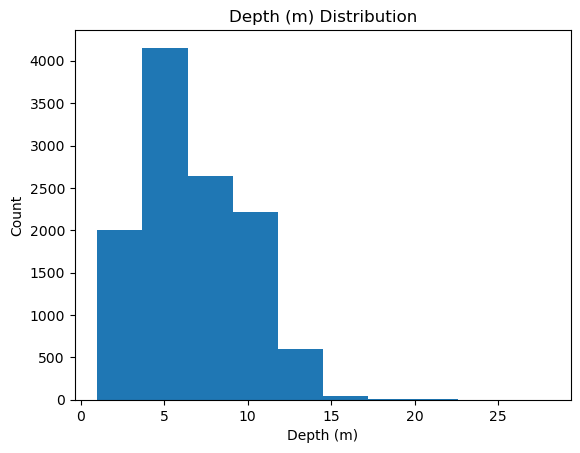

In [24]:
# create histogram using Matplotlib
plt.hist(corals_df["Depth_m"])

# add labels and title
plt.xlabel("Depth (m)")
plt.ylabel("Count")
plt.title("Depth (m) Distribution")

#### Right-skewed distribution of depth

#### Usage of inputted data using median is used to use as complete coral data must be used for higher accuracy of coral bleaching

In [25]:
# For these codes, I will fill the NaN or missing values using the median. 
# Afterward, I will round the values to whole numbers, 
# since it pertains to the depth attribute, and convert them to an float64 data type.
corals_df['Depth_m'].fillna(corals_df['Depth_m'].median(), inplace = True)
corals_df['Depth_m'] = corals_df['Depth_m'].round()
corals_df['Depth_m'] = corals_df['Depth_m'].astype('float64')
corals_df.head(5)

,Sample_ID,Cyclone_Frequency,Depth_m,ClimSST,Ocean_Name,Country_Name,Distance_to_Shore,Exposure,Turbidity,Date_Year,Bleaching_Level,Temperature_Maximum,SSTA,TSA,Percent_Bleaching,Temperature_Mean,Realm_Name,Percent_Cover
65,10324937,47.39,6.0,300.76,Pacific,Indonesia,301.90,Exposed,0.0849,2010,Colony,305.44,0.10,-0.72,55.0,301.71,Central Indo-Pacific,NaN
66,10324938,47.39,6.0,300.67,Pacific,Indonesia,194.45,Exposed,0.0442,2010,Colony,305.45,0.12,-0.69,55.0,301.61,Central Indo-Pacific,NaN
67,10324939,47.39,6.0,300.66,Pacific,Indonesia,51.85,Exposed,0.0849,2010,Colony,305.47,0.19,-0.65,55.0,301.59,Central Indo-Pacific,NaN
164,10323982,49.88,7.0,301.83,Pacific,Cambodia,180.45,Sheltered,0.1265,2010,Colony,307.01,1.78,1.06,60.0,302.23,Central Indo-Pacific,NaN
175,10324921,48.78,6.0,302.62,Indian,Indonesia,1013.58,Sheltered,0.0444,2010,Colony,305.58,1.13,1.09,60.0,302.05,Central Indo-Pacific,NaN


### Sanity checking all null values removed in Depth Column

In [26]:
corals_df.isnull().sum()

Sample_ID                 0
Cyclone_Frequency         0
Depth_m                   0
ClimSST                  52
Ocean_Name                0
Country_Name              0
Distance_to_Shore         0
Exposure                  0
Turbidity                 2
Date_Year                 0
Bleaching_Level           0
Temperature_Maximum      59
SSTA                     67
TSA                      67
Percent_Bleaching      2728
Temperature_Mean         59
Realm_Name                0
Percent_Cover           260
dtype: int64

### Percent_Bleaching

Text(0.5, 1.0, 'Bleaching Percentage Distribution')

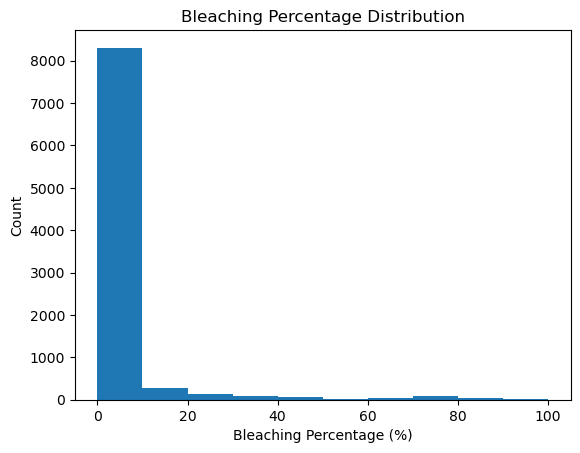

In [27]:
# create histogram using Matplotlib
plt.hist(corals_df["Percent_Bleaching"])

# add labels and title
plt.xlabel("Bleaching Percentage (%)")
plt.ylabel("Count")
plt.title("Bleaching Percentage Distribution")

#### Removal of Bleaching Percentage Null Values, as I am predicting it, it is too risky to input data of percent bleaching.

In [28]:
# Drop NA vals of percent bleaching
corals_df = corals_df.dropna(subset=['Percent_Bleaching'])

### Sanity checking null values in percent bleaching is removed

In [29]:
corals_df.isnull().sum()

Sample_ID                0
Cyclone_Frequency        0
Depth_m                  0
ClimSST                 52
Ocean_Name               0
Country_Name             0
Distance_to_Shore        0
Exposure                 0
Turbidity                2
Date_Year                0
Bleaching_Level          0
Temperature_Maximum     55
SSTA                    63
TSA                     63
Percent_Bleaching        0
Temperature_Mean        55
Realm_Name               0
Percent_Cover          224
dtype: int64

### Percent_Cover

Text(0.5, 1.0, 'Cover Percentage Distribution')

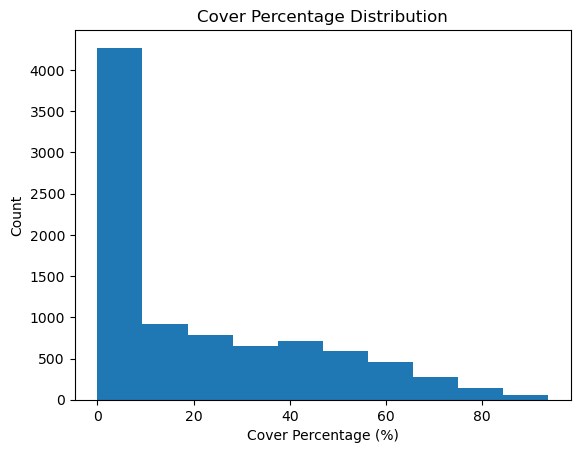

In [30]:
# create histogram using Matplotlib
plt.hist(corals_df["Percent_Cover"])

# add labels and title
plt.xlabel("Cover Percentage (%)")
plt.ylabel("Count")
plt.title("Cover Percentage Distribution")

#### Right skewed Distribution from histogram, appropriate to use median to input missing values

In [31]:
# For these codes, I will fill the NaN or missing values using the median. 
# Afterward, I will round the values to whole numbers, 
# since it pertains to the percent cover attribute, and convert them to an float64 data type.
corals_df['Percent_Cover'].fillna(corals_df['Percent_Cover'].median(), inplace = True)
corals_df['Percent_Cover'] = corals_df['Percent_Cover'].round(2)
corals_df['Percent_Cover'] = corals_df['Percent_Cover'].astype('float64')
corals_df.head(5)

,Sample_ID,Cyclone_Frequency,Depth_m,ClimSST,Ocean_Name,Country_Name,Distance_to_Shore,Exposure,Turbidity,Date_Year,Bleaching_Level,Temperature_Maximum,SSTA,TSA,Percent_Bleaching,Temperature_Mean,Realm_Name,Percent_Cover
65,10324937,47.39,6.0,300.76,Pacific,Indonesia,301.90,Exposed,0.0849,2010,Colony,305.44,0.10,-0.72,55.0,301.71,Central Indo-Pacific,10.62
66,10324938,47.39,6.0,300.67,Pacific,Indonesia,194.45,Exposed,0.0442,2010,Colony,305.45,0.12,-0.69,55.0,301.61,Central Indo-Pacific,10.62
67,10324939,47.39,6.0,300.66,Pacific,Indonesia,51.85,Exposed,0.0849,2010,Colony,305.47,0.19,-0.65,55.0,301.59,Central Indo-Pacific,10.62
164,10323982,49.88,7.0,301.83,Pacific,Cambodia,180.45,Sheltered,0.1265,2010,Colony,307.01,1.78,1.06,60.0,302.23,Central Indo-Pacific,10.62
175,10324921,48.78,6.0,302.62,Indian,Indonesia,1013.58,Sheltered,0.0444,2010,Colony,305.58,1.13,1.09,60.0,302.05,Central Indo-Pacific,10.62


### Sanity checking null values in percent_cover column is removed

In [32]:
corals_df.isnull().sum()

Sample_ID               0
Cyclone_Frequency       0
Depth_m                 0
ClimSST                52
Ocean_Name              0
Country_Name            0
Distance_to_Shore       0
Exposure                0
Turbidity               2
Date_Year               0
Bleaching_Level         0
Temperature_Maximum    55
SSTA                   63
TSA                    63
Percent_Bleaching       0
Temperature_Mean       55
Realm_Name              0
Percent_Cover           0
dtype: int64

#### For the rest of the columns that have less than 100 missing values, I will remove it.

In [33]:
corals_df.dropna(inplace=True)

In [34]:
corals_df.isnull().sum()

Sample_ID              0
Cyclone_Frequency      0
Depth_m                0
ClimSST                0
Ocean_Name             0
Country_Name           0
Distance_to_Shore      0
Exposure               0
Turbidity              0
Date_Year              0
Bleaching_Level        0
Temperature_Maximum    0
SSTA                   0
TSA                    0
Percent_Bleaching      0
Temperature_Mean       0
Realm_Name             0
Percent_Cover          0
dtype: int64

In [35]:
corals_df.head(5)

,Sample_ID,Cyclone_Frequency,Depth_m,ClimSST,Ocean_Name,Country_Name,Distance_to_Shore,Exposure,Turbidity,Date_Year,Bleaching_Level,Temperature_Maximum,SSTA,TSA,Percent_Bleaching,Temperature_Mean,Realm_Name,Percent_Cover
65,10324937,47.39,6.0,300.76,Pacific,Indonesia,301.90,Exposed,0.0849,2010,Colony,305.44,0.10,-0.72,55.0,301.71,Central Indo-Pacific,10.62
66,10324938,47.39,6.0,300.67,Pacific,Indonesia,194.45,Exposed,0.0442,2010,Colony,305.45,0.12,-0.69,55.0,301.61,Central Indo-Pacific,10.62
67,10324939,47.39,6.0,300.66,Pacific,Indonesia,51.85,Exposed,0.0849,2010,Colony,305.47,0.19,-0.65,55.0,301.59,Central Indo-Pacific,10.62
164,10323982,49.88,7.0,301.83,Pacific,Cambodia,180.45,Sheltered,0.1265,2010,Colony,307.01,1.78,1.06,60.0,302.23,Central Indo-Pacific,10.62
175,10324921,48.78,6.0,302.62,Indian,Indonesia,1013.58,Sheltered,0.0444,2010,Colony,305.58,1.13,1.09,60.0,302.05,Central Indo-Pacific,10.62


### Sanity checking no null values in dataset

In [36]:
corals_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9016 entries, 65 to 35039
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sample_ID            9016 non-null   int64  
 1   Cyclone_Frequency    9016 non-null   float64
 2   Depth_m              9016 non-null   float64
 3   ClimSST              9016 non-null   float64
 4   Ocean_Name           9016 non-null   object 
 5   Country_Name         9016 non-null   object 
 6   Distance_to_Shore    9016 non-null   float64
 7   Exposure             9016 non-null   object 
 8   Turbidity            9016 non-null   float64
 9   Date_Year            9016 non-null   int64  
 10  Bleaching_Level      9016 non-null   object 
 11  Temperature_Maximum  9016 non-null   float64
 12  SSTA                 9016 non-null   float64
 13  TSA                  9016 non-null   float64
 14  Percent_Bleaching    9016 non-null   float64
 15  Temperature_Mean     9016 non-null   floa

## 2.  Feature Selection
---

#### For the Coral Bleaching percentage prediction, the following columns will be removed:

#### Why?:

1. Sample_ID: Unique identifier for each sampling event and does not provide any meaningful predictive information for coral bleaching.     

2. Ocean_Name: Other features (e.g., SST, SSTA, TSA) already capture ocean-specific differences, this column becomes redundant.

3. Temperature_Mean: Represents the average sea surface temperature during sampling, but it may not be as informative as other temperature-related features like Temperature_Maximum, SSTA (Sea Surface Temperature Anomaly), or TSA (Thermal Stress Anomaly) for better prediction of coral bleaching.

4. Realm_Name: Provides ecological realm classification (e.g., Marine Ecoregions of the World). However, its impact on coral bleaching might already be captured by other variables like geographic location (Country_Name) or environmental factors (e.g., SST, turbidity)

5. Date_Year: Relevant for analyzing long-term trends, it is not directly predictive of bleaching percentages in a machine learning model.

### Removal of redundant columns

In [37]:
# List of columns to drop from previous analysis
columns_to_drop = [
    "Sample_ID",       # Unique identifier, no predictive value
    "Ocean_Name",      # Redundant with SSTA/TSA ( better indicators )
    "Temperature_Mean",# Less informative than Temperature_Maximum, SSTA, TSA
    "Realm_Name",      # Potentially redundant with geographic/location data aka country name column
    "Date_Year"        # Temporal trends likely captured by SSTA/TSA
]

# Dropping the redundant columns
corals_df = corals_df.drop(columns=columns_to_drop)

# Check the updated DataFrame
print(corals_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 9016 entries, 65 to 35039
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cyclone_Frequency    9016 non-null   float64
 1   Depth_m              9016 non-null   float64
 2   ClimSST              9016 non-null   float64
 3   Country_Name         9016 non-null   object 
 4   Distance_to_Shore    9016 non-null   float64
 5   Exposure             9016 non-null   object 
 6   Turbidity            9016 non-null   float64
 7   Bleaching_Level      9016 non-null   object 
 8   Temperature_Maximum  9016 non-null   float64
 9   SSTA                 9016 non-null   float64
 10  TSA                  9016 non-null   float64
 11  Percent_Bleaching    9016 non-null   float64
 12  Percent_Cover        9016 non-null   float64
dtypes: float64(10), object(3)
memory usage: 986.1+ KB
None


## 3.  Data Visualisation (matplotlib and Seaborn)
---

### Numeric Columns

In [38]:
corals_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cyclone_Frequency,9016.0,51.606466,3.208882,23.070,49.4600,50.2700,54.4400,64.6300
Depth_m,9016.0,6.888975,2.782838,1.000,5.0000,6.0000,9.0000,28.0000
ClimSST,9016.0,296.675374,13.876652,262.150,301.1900,302.1700,302.7700,304.1100
Distance_to_Shore,9016.0,1396.497907,5213.692609,3.680,90.8200,194.0800,658.4300,162082.3300
Turbidity,9016.0,0.085244,0.052172,0.023,0.0542,0.0676,0.0957,0.6108
Temperature_Maximum,9016.0,305.862554,0.935464,303.450,305.3875,305.7000,306.2100,313.1400
SSTA,9016.0,0.246318,0.836660,-2.830,-0.2700,0.2300,0.7900,3.3100
TSA,9016.0,-0.511487,1.153171,-6.950,-1.2300,-0.4500,0.2600,3.2700
Percent_Bleaching,9016.0,3.560312,12.613217,0.000,0.0000,0.0000,0.7500,100.0000
Percent_Cover,9016.0,20.338950,22.890057,0.000,0.6200,10.6200,36.2500,93.7500


### Non-numeric columns

In [39]:
corals_df.describe(include='object').T

,count,unique,top,freq
Country_Name,9016,9,Malaysia,4236
Exposure,9016,3,Sheltered,6860
Bleaching_Level,9016,2,Population,8763


### Count Distribution (Numeric Columns)

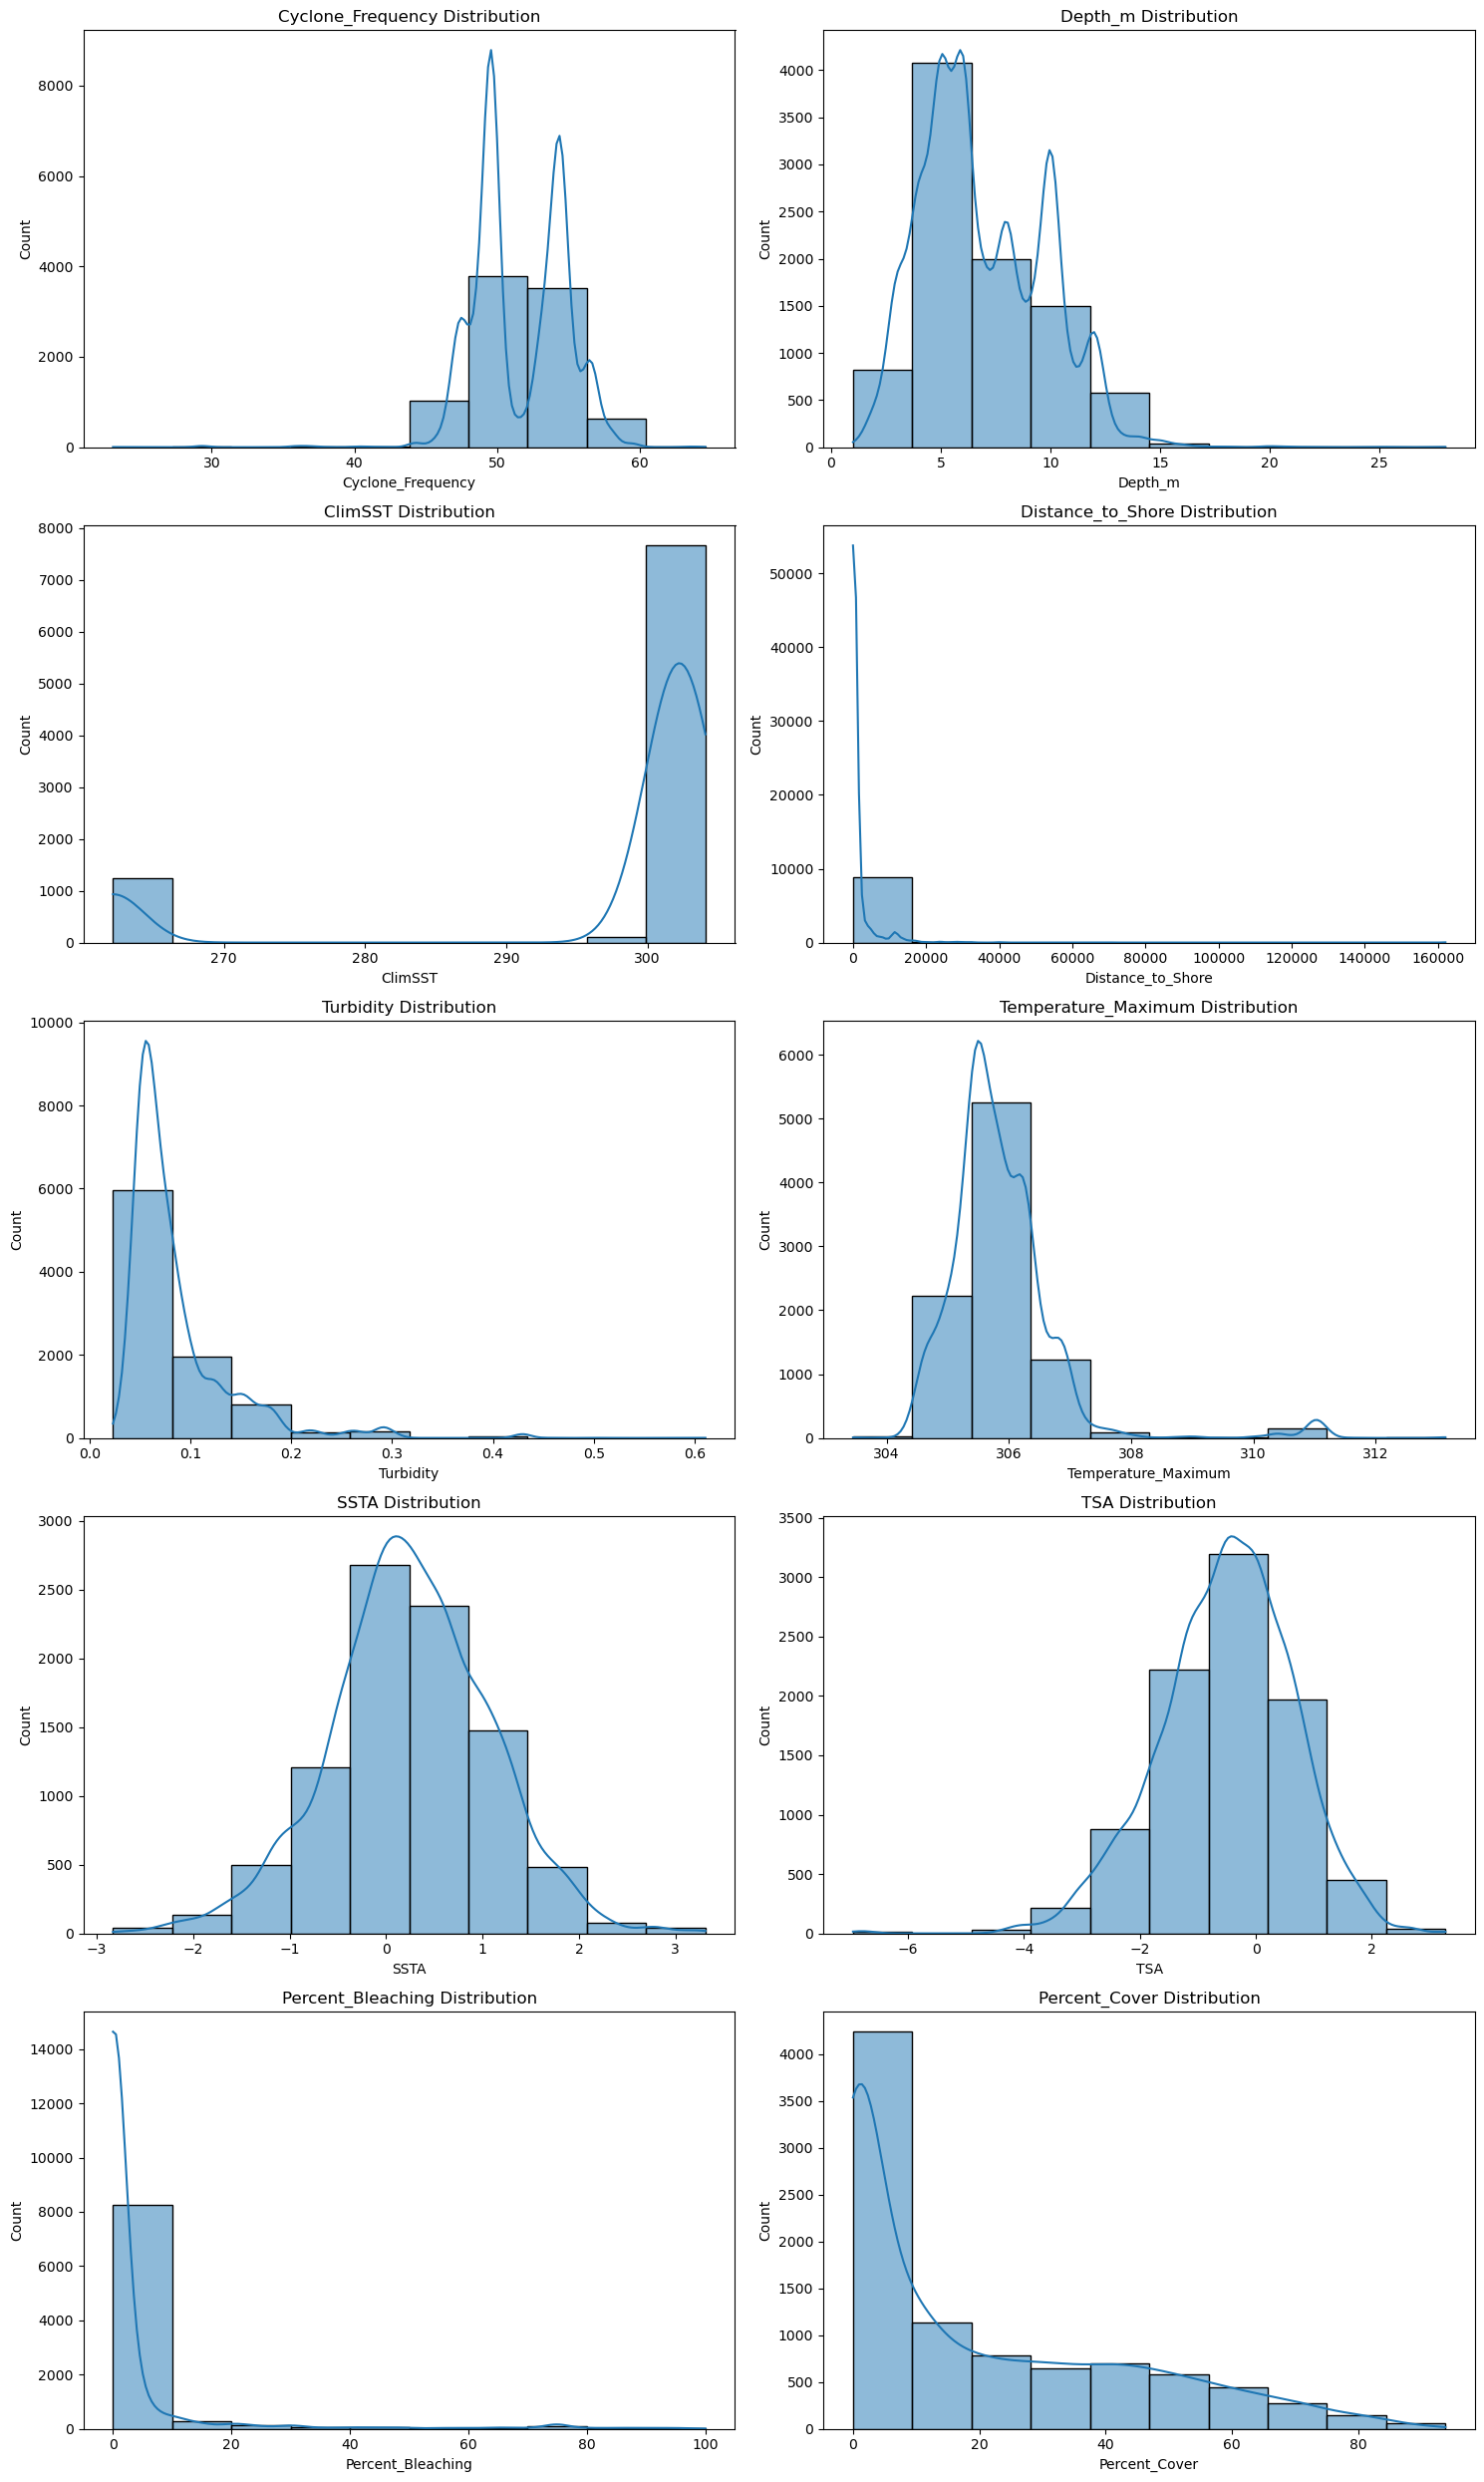

In [40]:
fig, axes = plt.subplots(5, 2, figsize=(15, 25), sharex=False)

def countDistribution(dataset, column, bin, ax):
    sns.histplot(dataset, x=column, bins=bin, kde=True, ax=ax, edgecolor="black")
    ax.set_title(f"{column} Distribution")

columns = corals_df.select_dtypes(include='number').columns

axes = axes.flatten()

for i, column in enumerate(columns):
    countDistribution(corals_df, column, 10, axes[i])

plt.tight_layout()
plt.show()

### Count Distribution ( Objects )
---

#### Countries Column

Text(0.5, 1.0, 'SEA Countries Distribution')

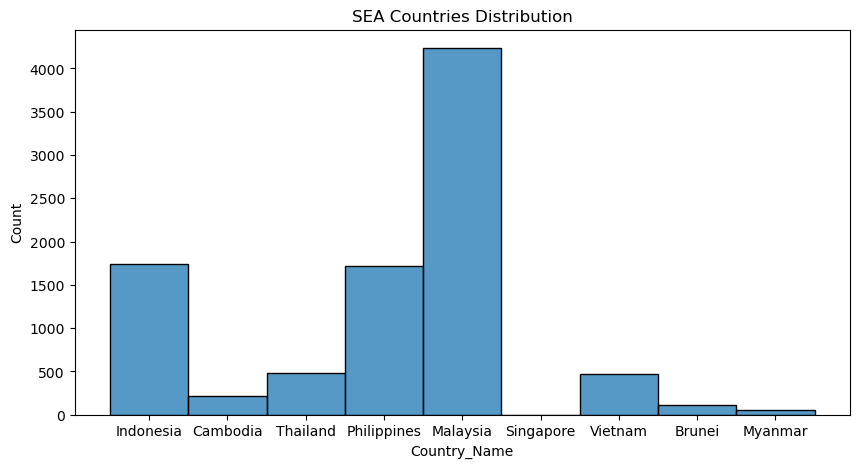

In [41]:
fig, axes = plt.subplots(figsize=(10, 5), sharex=False)
sns.histplot(corals_df, x="Country_Name", ax=axes)

plt.title("SEA Countries Distribution")

#### Exposure Distribution

Text(0.5, 1.0, 'Exposure Distribution')

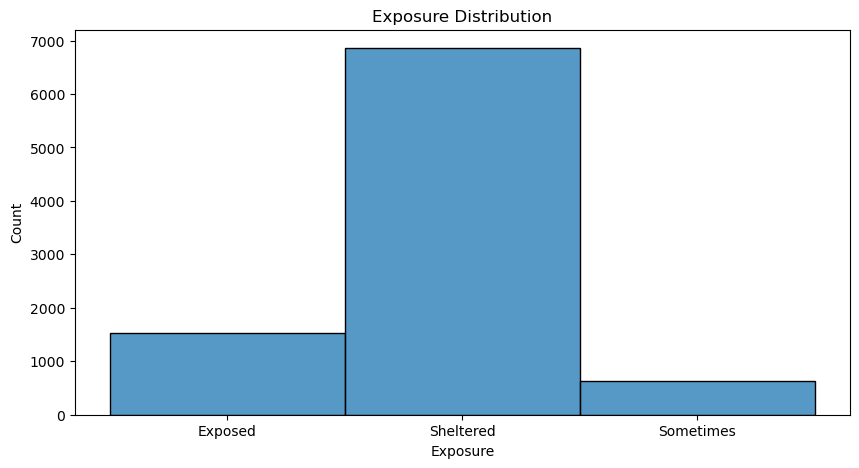

In [42]:
fig, axes = plt.subplots(figsize=(10, 5), sharex=False)
sns.histplot(corals_df, x="Exposure", ax=axes)

plt.title("Exposure Distribution")

#### Bleaching Level Column

Text(0.5, 1.0, 'Bleaching_Level Distribution')

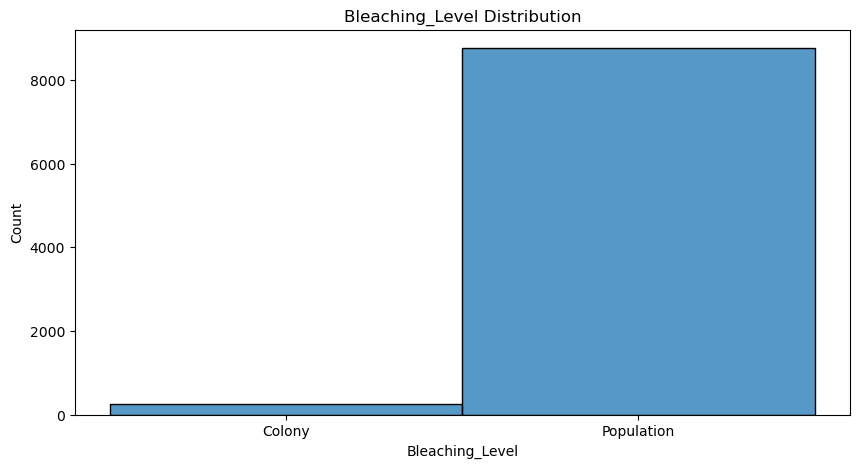

In [43]:
fig, axes = plt.subplots(figsize=(10, 5), sharex=False)
sns.histplot(corals_df, x="Bleaching_Level", ax=axes)

plt.title("Bleaching_Level Distribution")

### Multi-feature Histogram (Percent_Bleaching vs Exposure vs bleaching level)

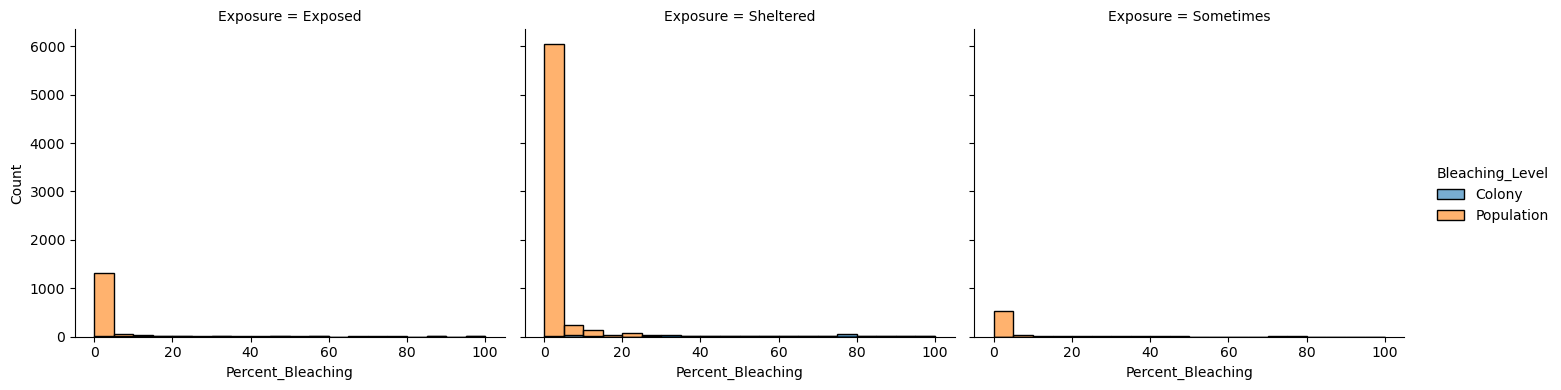

In [44]:
sns.displot(
    data=corals_df,
    x="Percent_Bleaching",
    col="Exposure",          
    kind='hist',              
    hue='Bleaching_Level',   
    height=4,               
    aspect=1.2,               
    alpha=0.6,               
    col_wrap=3,               
    bins=20                   
)

# Show the plot
plt.show()

### CatPlot (Percent_Bleaching vs Bleaching Level vs Exposure)

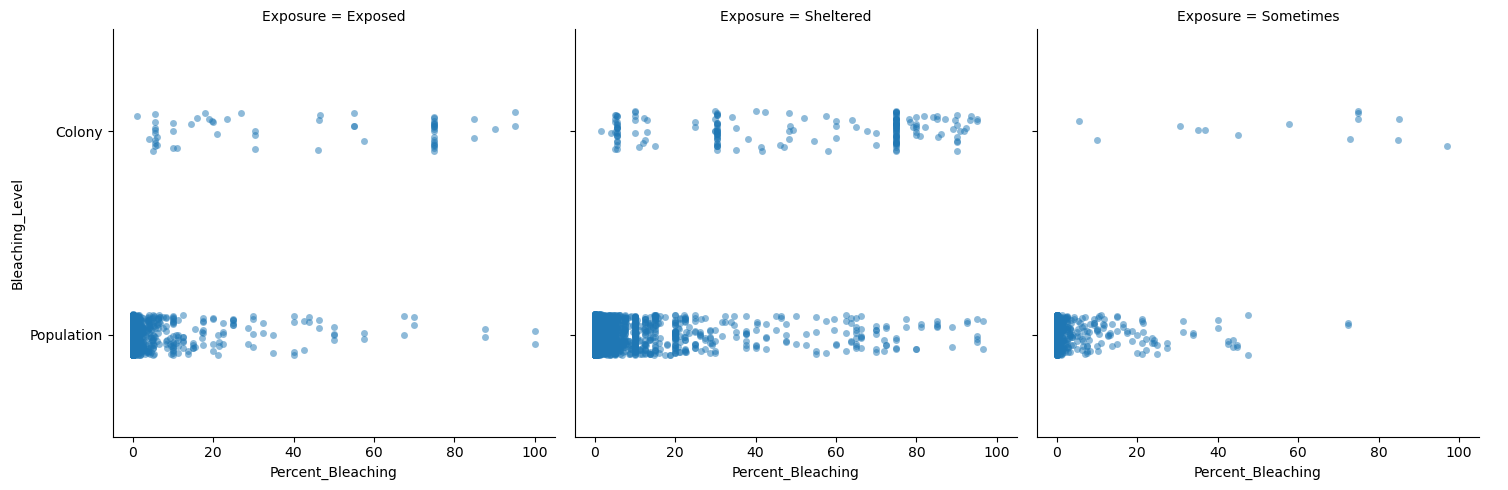

In [45]:
sns.catplot(corals_df,
            # kind='hist',
            x="Percent_Bleaching",
            y='Bleaching_Level',
            col='Exposure',
            alpha=0.5
            )

### Scatter Plot Distribution for numeric type columns

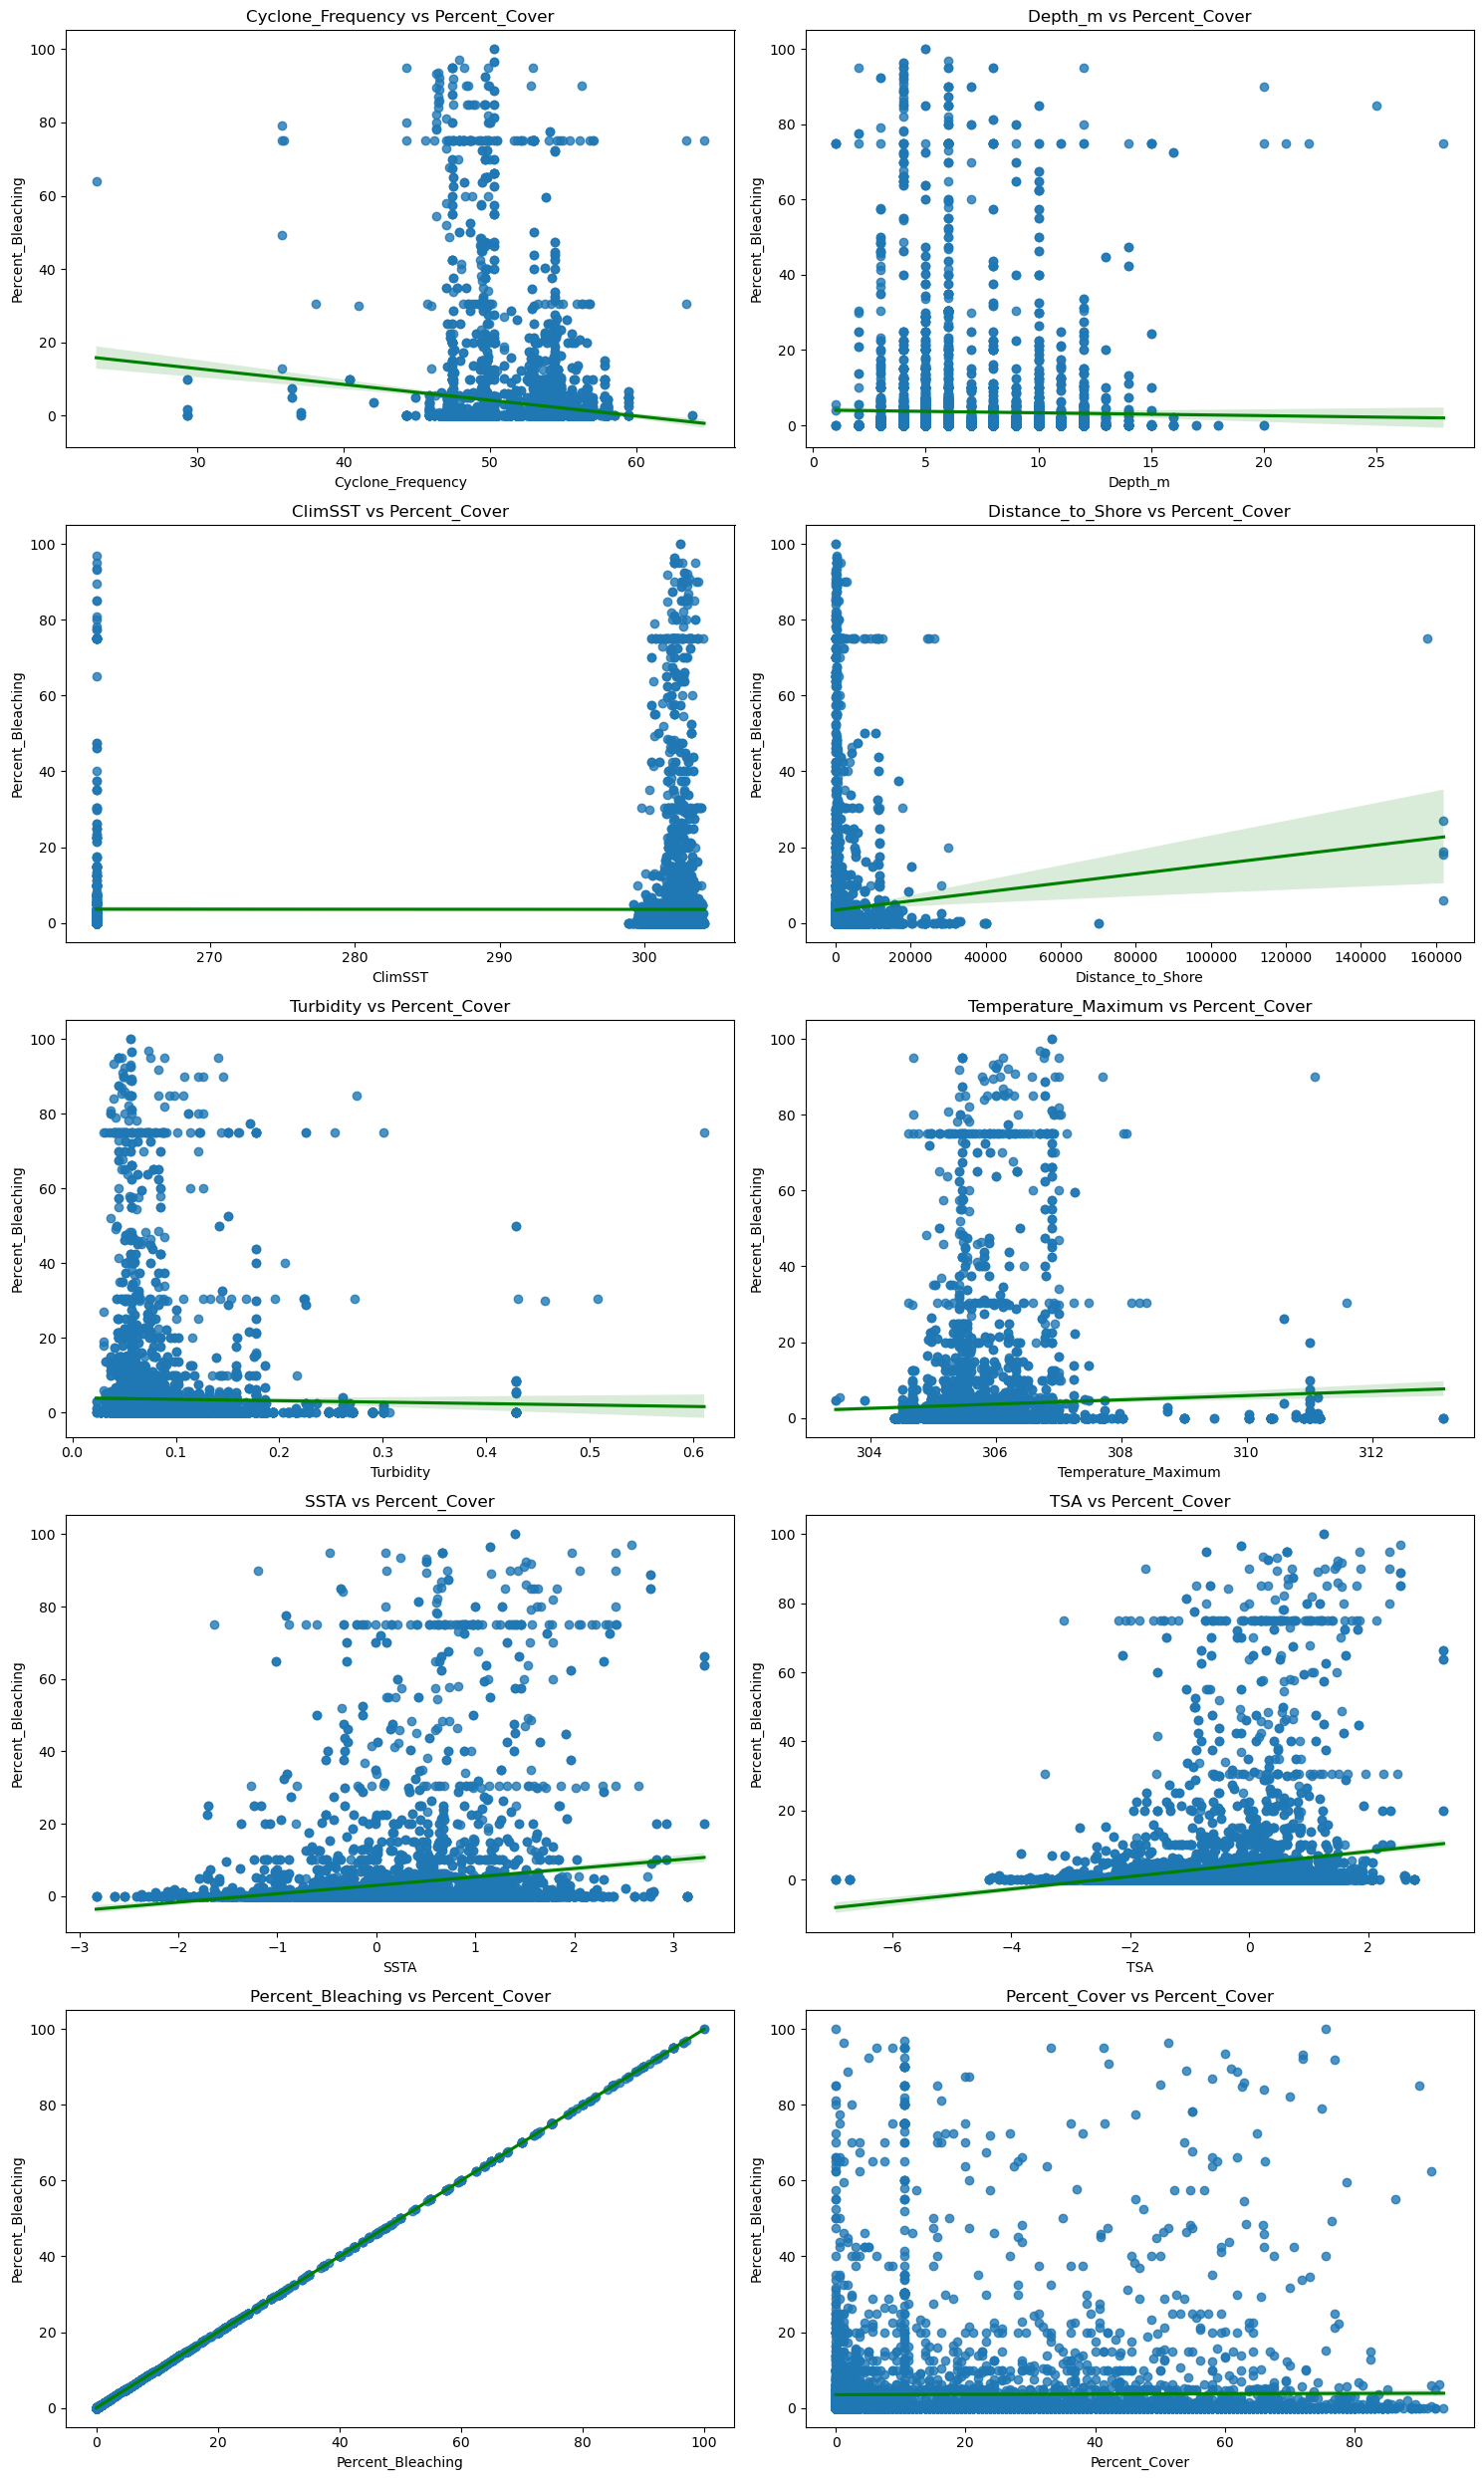

In [46]:
fig, axes = plt.subplots(5, 2, figsize=(15, 25), sharex=False)

def scatterDistribution(dataset, column, ax):
    sns.regplot(corals_df, x=column, y='Percent_Bleaching', line_kws={'color': 'g'}, ax=ax)
    ax.set_title(f"{column} vs Percent_Cover")

columns = corals_df.select_dtypes(include='number').columns

axes = axes.flatten()

for i, column in enumerate(columns):
    scatterDistribution(corals_df, column, axes[i])

plt.tight_layout()
plt.show()

### Violin plot (Percent_Bleaching vs Exposure)

Text(0.5, 1.0, 'Percent Bleaching against Exposure')

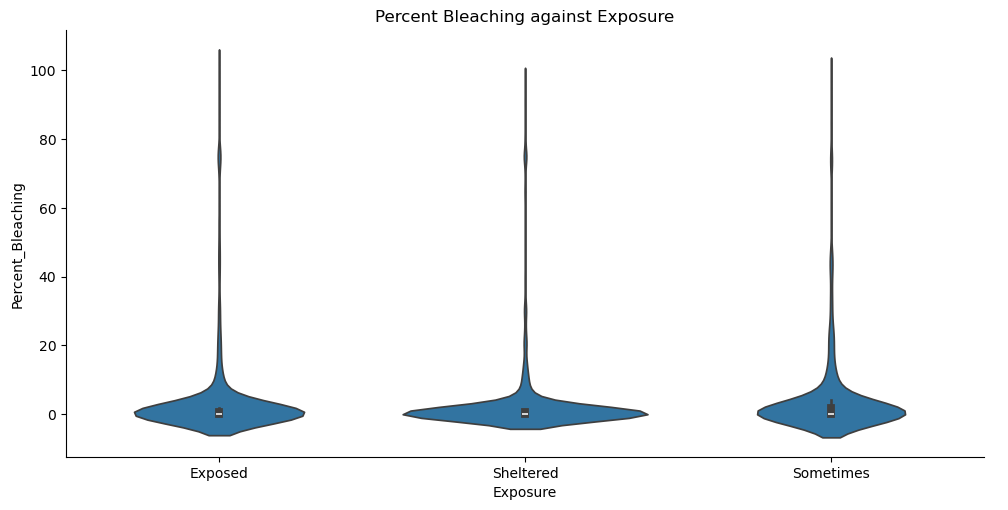

In [47]:
sns.catplot(corals_df.sort_values(by='Exposure'), x='Exposure', y='Percent_Bleaching', kind='violin', aspect=2)
plt.title("Percent Bleaching against Exposure")

### Violin Plot (Percent_Bleaching vs Bleaching Level)

Text(0.5, 1.0, 'Percent Bleaching against Bleaching Level')

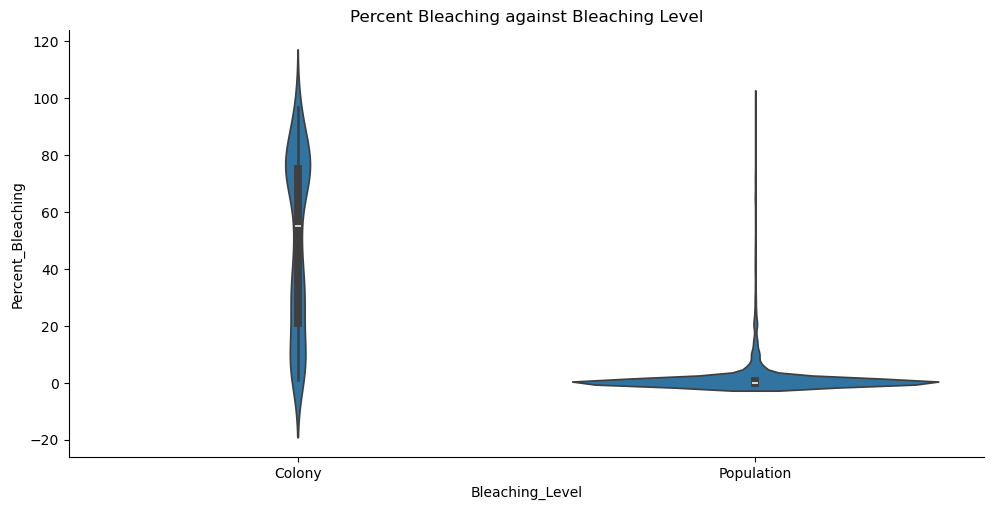

In [48]:
sns.catplot(corals_df.sort_values(by='Bleaching_Level'), x='Bleaching_Level', y='Percent_Bleaching', kind='violin', aspect=2)
plt.title("Percent Bleaching against Bleaching Level")

### Line plot graph (Percent_Cover vs Depth_m)

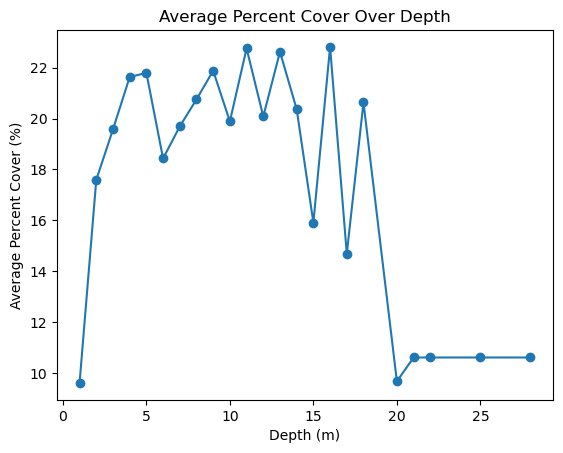

In [49]:
avg = corals_df.groupby('Depth_m')['Percent_Cover'].mean()
avg.plot(kind='line', marker='o')
plt.title('Average Percent Cover Over Depth')
plt.xlabel('Depth (m)')
plt.ylabel('Average Percent Cover (%)')
plt.show()

### HeatMap (Correlation Matrix)

<Axes: >

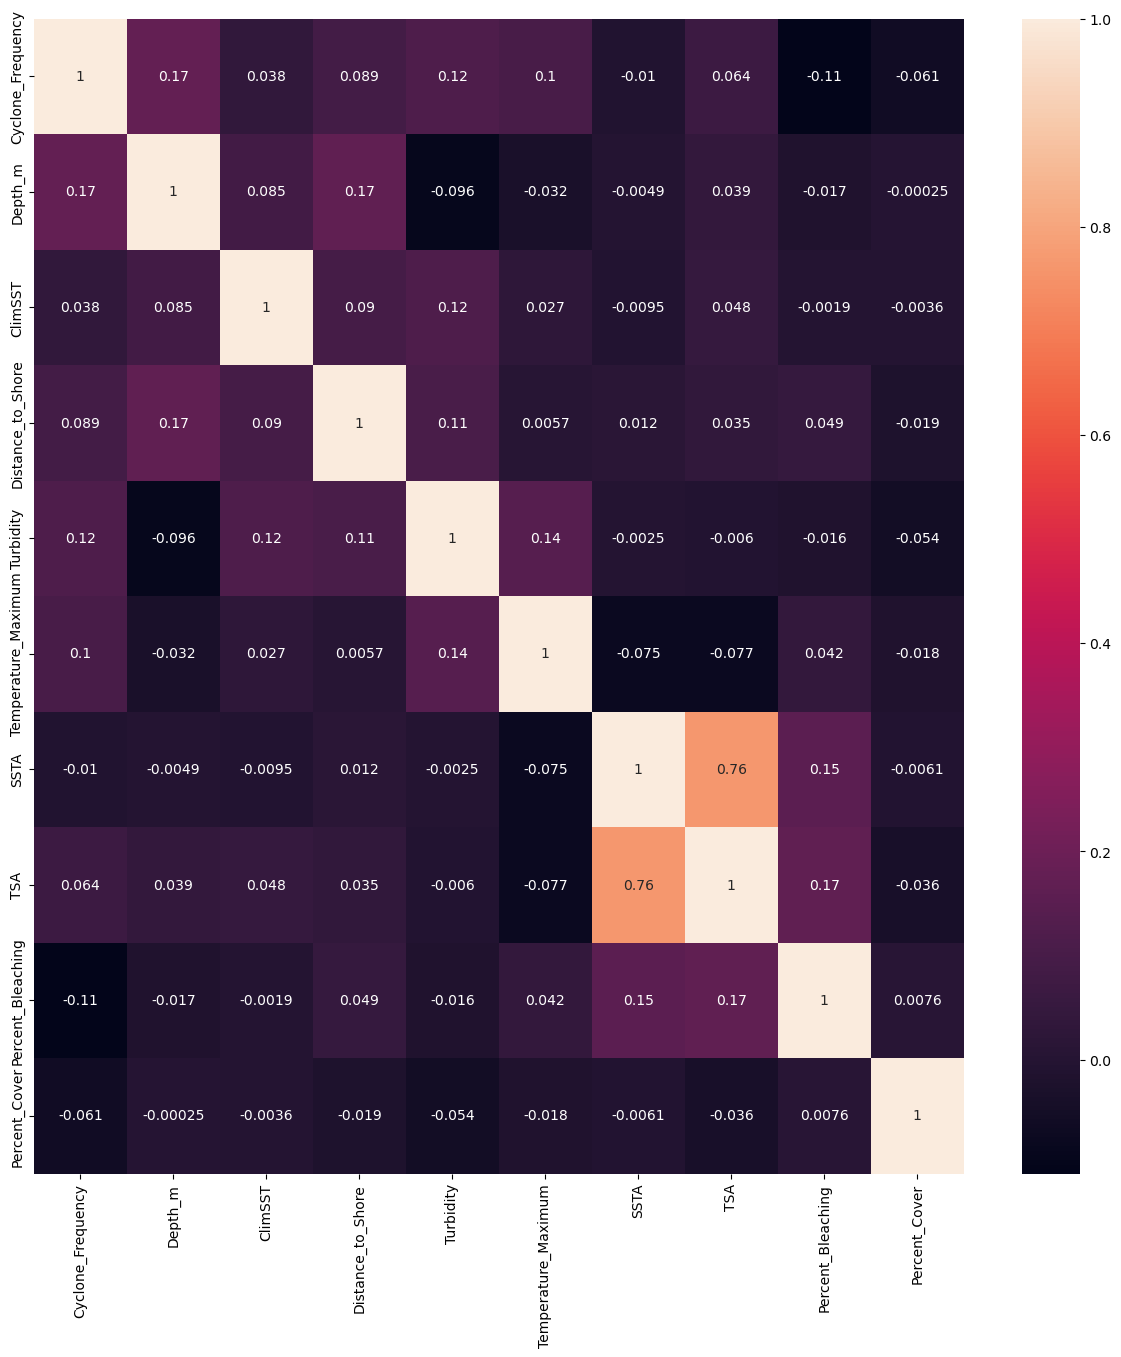

In [50]:
# check correlation of variables to one another
s=corals_df.select_dtypes(include='number').corr()
plt.figure(figsize=(15,15))
sns.heatmap(s, annot=True)

### Pie chart (Country Names)

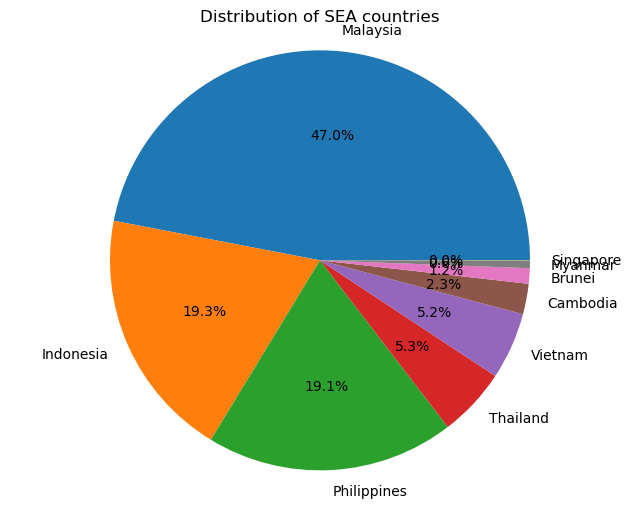

In [51]:
Country_Name = corals_df['Country_Name'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(Country_Name, labels=Country_Name.index, autopct='%1.1f%%')
plt.title('Distribution of SEA countries')
plt.axis('equal')

plt.show()

### Pie chart (Exposure)

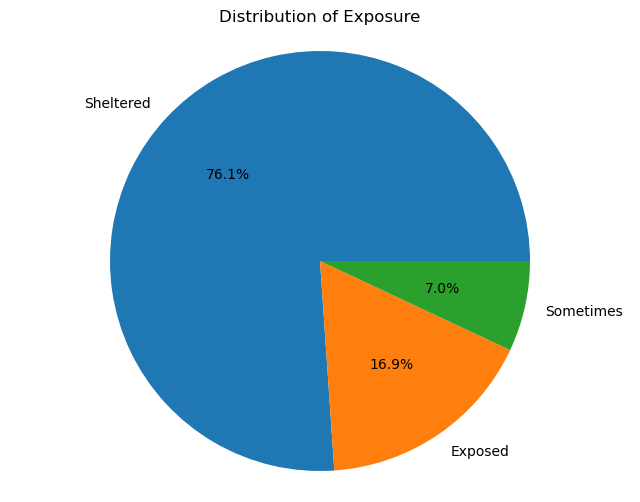

In [52]:
Exposure = corals_df['Exposure'].value_counts()

plt.figure(figsize=(8, 6)) 
plt.pie(Exposure, labels=Exposure.index, autopct='%1.1f%%')
plt.title('Distribution of Exposure')
plt.axis('equal')

plt.show()

### Pie chart (Bleaching Levels)

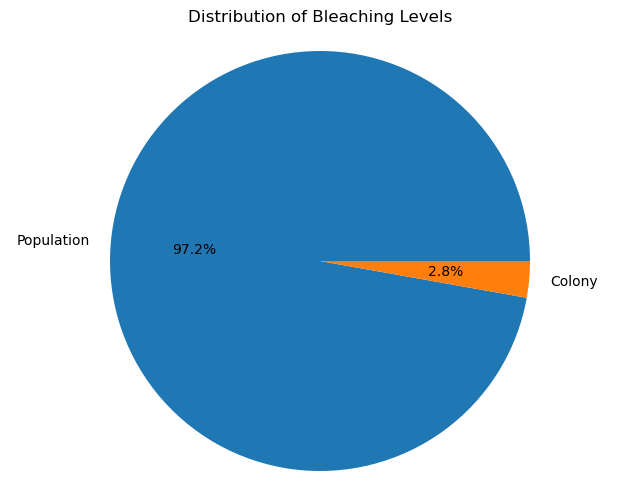

In [53]:
Bleaching_Level = corals_df['Bleaching_Level'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(Bleaching_Level, labels=Bleaching_Level.index, autopct='%1.1f%%')
plt.title('Distribution of Bleaching Levels')
plt.axis('equal') 

plt.show()

### kdeplot (Density of values) (Percent_Cover)

<Axes: xlabel='Percent_Cover', ylabel='Density'>

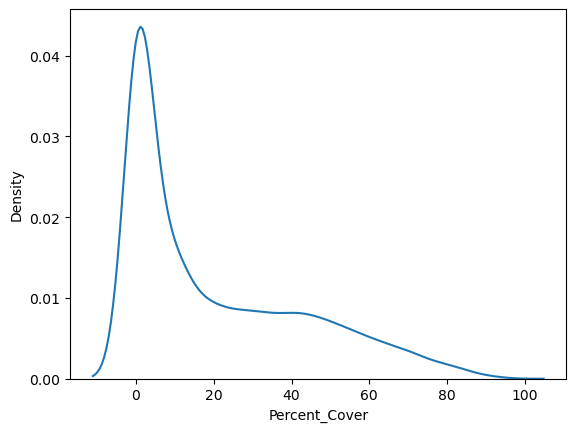

In [54]:
sns.kdeplot(corals_df, x="Percent_Cover")

### Boxplot (Percent_Cover vs Country Names)

<Axes: xlabel='Country_Name', ylabel='Percent_Cover'>

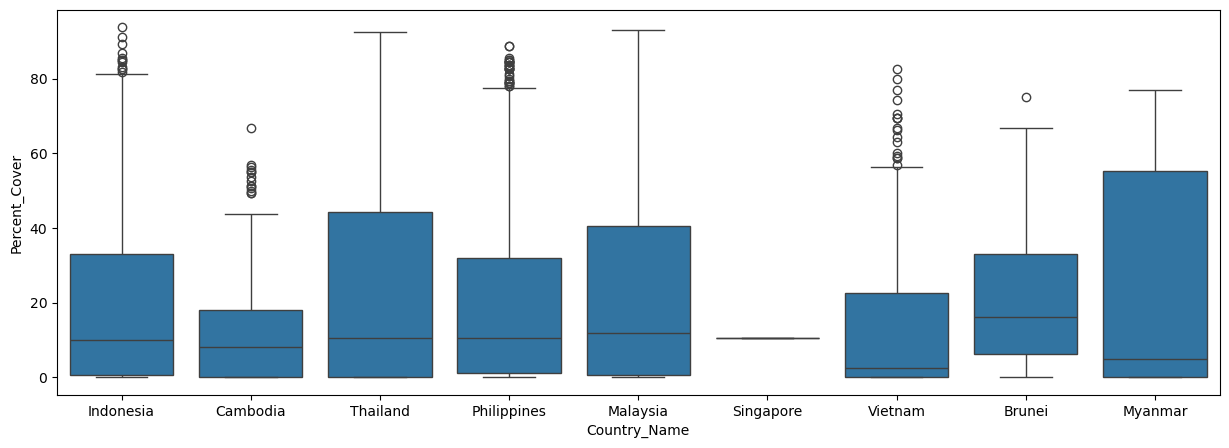

In [56]:
# boxplot
plt.figure(figsize=(15,5))
sns.boxplot(corals_df, x="Country_Name", y="Percent_Cover")

## 4. Data Preparation
---

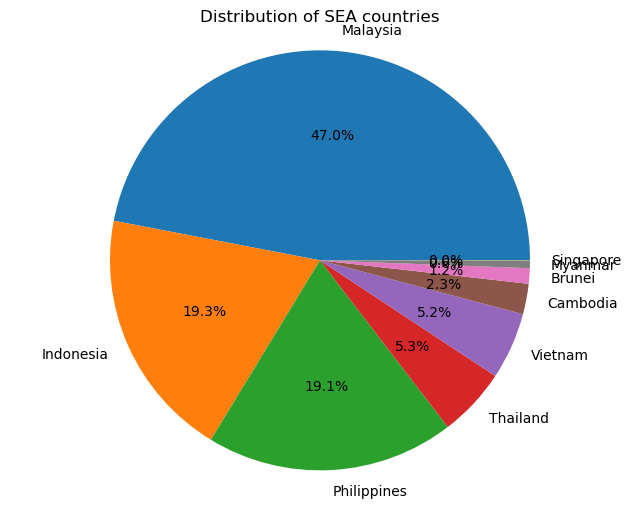

In [56]:
Country_Name = corals_df['Country_Name'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(Country_Name, labels=Country_Name.index, autopct='%1.1f%%')
plt.title('Distribution of SEA countries')
plt.axis('equal')

plt.show()

### Adding Countries percentages lower than 10% into 1 Common Name for easier visusalisation

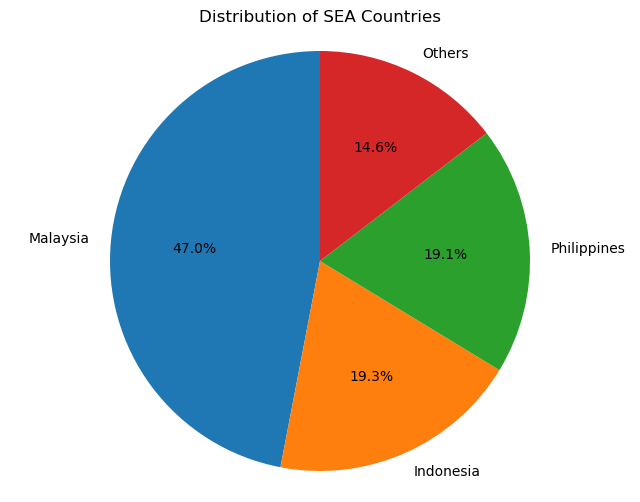

Countries grouped into 'Others':
['Thailand', 'Vietnam', 'Cambodia', 'Brunei', 'Myanmar', 'Singapore']


In [57]:
# Step 1: Get the value counts for 'Country_Name'
Country_Name = corals_df['Country_Name'].value_counts()

# Total count of all countries
total_count = Country_Name.sum()

# Define threshold as 10% of the total count
threshold = 0.1 * total_count

# Identify main countries (above the threshold)
main_countries = Country_Name[Country_Name >= threshold].index

# Create a list of countries that fall into the "Others" category
other_countries = Country_Name[Country_Name < threshold].index.tolist()

# Group smaller countries into "Others"
corals_df['Country_Name'] = corals_df['Country_Name'].apply(lambda x: x if x in main_countries else 'Others')

# Updated value counts after grouping
updated_counts = corals_df['Country_Name'].value_counts()

# Step 2: Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(updated_counts, labels=updated_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of SEA Countries')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()

# Step 3: Display the list of countries grouped into "Others"
print("Countries grouped into 'Others':")
print(other_countries)

### Value Counts of Countries + Other Countries

In [58]:
corals_df['Country_Name'].value_counts()

Country_Name
Malaysia       4236
Indonesia      1742
Philippines    1723
Others         1315
Name: count, dtype: int64

### Sampling Data After Treatment ( Sanity Checking )

In [59]:
corals_df.sample(5)

,Cyclone_Frequency,Depth_m,ClimSST,Country_Name,Distance_to_Shore,Exposure,Turbidity,Bleaching_Level,Temperature_Maximum,SSTA,TSA,Percent_Bleaching,Percent_Cover
18965,54.26,3.0,302.25,Philippines,745.03,Sheltered,0.0982,Population,307.73,1.36,1.31,0.00,20.62
12862,49.87,5.0,301.54,Indonesia,644.73,Sheltered,0.0444,Population,305.39,-0.79,-3.03,0.00,25.62
28097,47.27,8.0,262.15,Indonesia,101.13,Sheltered,0.0505,Population,305.33,0.05,-0.94,2.25,16.88
12605,47.39,10.0,301.60,Indonesia,241.76,Exposed,0.0442,Population,305.47,1.46,0.82,0.00,0.00
16625,53.74,12.0,300.80,Malaysia,97.19,Sheltered,0.0995,Population,305.80,0.06,-1.77,0.00,7.50


### One-Hot Encoding Non-Numeric Column
---

### Country_Name Column ( Non-numeric )

In [60]:
corals_df['Country_Name'].unique()

array(['Indonesia', 'Others', 'Philippines', 'Malaysia'], dtype=object)

In [61]:
corals_df['Country_Name'].value_counts()

Country_Name
Malaysia       4236
Indonesia      1742
Philippines    1723
Others         1315
Name: count, dtype: int64

### Exposure Column ( Non-numeric )

In [62]:
corals_df['Exposure'].unique()

array(['Exposed', 'Sheltered', 'Sometimes'], dtype=object)

In [63]:
corals_df['Exposure'].value_counts()

Exposure
Sheltered    6860
Exposed      1527
Sometimes     629
Name: count, dtype: int64

### Bleaching Level Column ( Non-numeric )

In [64]:
corals_df['Bleaching_Level'].unique()

array(['Colony', 'Population'], dtype=object)

In [65]:
corals_df['Bleaching_Level'].value_counts()

Bleaching_Level
Population    8763
Colony         253
Name: count, dtype: int64

### Encoding Non-numeric columns
---

### Country Name

In [66]:
corals_df = pd.get_dummies(corals_df, columns=['Country_Name'], prefix='Country_Name', drop_first=True) # drop first to remove multicollinearity issue

### Exposure

In [67]:
corals_df = pd.get_dummies(corals_df, columns=['Exposure'], prefix='Exposure',  drop_first=True)

### Bleaching Level

In [68]:
corals_df = pd.get_dummies(corals_df, columns=['Bleaching_Level'], prefix='Bleaching_Level',  drop_first=True)

### Sanity Checking After One-hot encoding

In [69]:
display(corals_df)

,Cyclone_Frequency,Depth_m,ClimSST,Distance_to_Shore,Turbidity,Temperature_Maximum,SSTA,TSA,Percent_Bleaching,Percent_Cover,Country_Name_Malaysia,Country_Name_Others,Country_Name_Philippines,Exposure_Sheltered,Exposure_Sometimes,Bleaching_Level_Population
65,47.39,6.0,300.76,301.90,0.0849,305.44,0.10,-0.72,55.0,10.62,False,False,False,False,False,False
66,47.39,6.0,300.67,194.45,0.0442,305.45,0.12,-0.69,55.0,10.62,False,False,False,False,False,False
67,47.39,6.0,300.66,51.85,0.0849,305.47,0.19,-0.65,55.0,10.62,False,False,False,False,False,False
164,49.88,7.0,301.83,180.45,0.1265,307.01,1.78,1.06,60.0,10.62,False,True,False,True,False,False
175,48.78,6.0,302.62,1013.58,0.0444,305.58,1.13,1.09,60.0,10.62,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35026,47.39,8.0,302.08,158.91,0.0442,305.47,0.66,0.64,95.0,6.25,False,False,False,True,False,True
35031,50.27,4.0,302.06,182.74,0.0568,306.79,1.15,-0.14,96.5,51.25,False,True,False,True,False,True
35032,50.27,4.0,302.06,182.74,0.0568,306.79,1.15,-0.14,96.5,1.25,False,True,False,True,False,True
35038,50.27,5.0,302.47,73.88,0.0565,306.89,1.40,1.26,100.0,75.62,False,True,False,False,False,True


### Converting boolean values to integers for model training

In [70]:
bool_columns = corals_df.select_dtypes(include=['bool']).columns

corals_df[bool_columns] = corals_df[bool_columns].astype('int64')

display(corals_df)

,Cyclone_Frequency,Depth_m,ClimSST,Distance_to_Shore,Turbidity,Temperature_Maximum,SSTA,TSA,Percent_Bleaching,Percent_Cover,Country_Name_Malaysia,Country_Name_Others,Country_Name_Philippines,Exposure_Sheltered,Exposure_Sometimes,Bleaching_Level_Population
65,47.39,6.0,300.76,301.90,0.0849,305.44,0.10,-0.72,55.0,10.62,0,0,0,0,0,0
66,47.39,6.0,300.67,194.45,0.0442,305.45,0.12,-0.69,55.0,10.62,0,0,0,0,0,0
67,47.39,6.0,300.66,51.85,0.0849,305.47,0.19,-0.65,55.0,10.62,0,0,0,0,0,0
164,49.88,7.0,301.83,180.45,0.1265,307.01,1.78,1.06,60.0,10.62,0,1,0,1,0,0
175,48.78,6.0,302.62,1013.58,0.0444,305.58,1.13,1.09,60.0,10.62,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35026,47.39,8.0,302.08,158.91,0.0442,305.47,0.66,0.64,95.0,6.25,0,0,0,1,0,1
35031,50.27,4.0,302.06,182.74,0.0568,306.79,1.15,-0.14,96.5,51.25,0,1,0,1,0,1
35032,50.27,4.0,302.06,182.74,0.0568,306.79,1.15,-0.14,96.5,1.25,0,1,0,1,0,1
35038,50.27,5.0,302.47,73.88,0.0565,306.89,1.40,1.26,100.0,75.62,0,1,0,0,0,1


In [71]:
corals_df.info() ### Double checking here

<class 'pandas.core.frame.DataFrame'>
Index: 9016 entries, 65 to 35039
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Cyclone_Frequency           9016 non-null   float64
 1   Depth_m                     9016 non-null   float64
 2   ClimSST                     9016 non-null   float64
 3   Distance_to_Shore           9016 non-null   float64
 4   Turbidity                   9016 non-null   float64
 5   Temperature_Maximum         9016 non-null   float64
 6   SSTA                        9016 non-null   float64
 7   TSA                         9016 non-null   float64
 8   Percent_Bleaching           9016 non-null   float64
 9   Percent_Cover               9016 non-null   float64
 10  Country_Name_Malaysia       9016 non-null   int64  
 11  Country_Name_Others         9016 non-null   int64  
 12  Country_Name_Philippines    9016 non-null   int64  
 13  Exposure_Sheltered          9016 non

### Removing 2 rows for model testing


In [72]:
testing_rows = corals_df.iloc[:2]
display(testing_rows)

,Cyclone_Frequency,Depth_m,ClimSST,Distance_to_Shore,Turbidity,Temperature_Maximum,SSTA,TSA,Percent_Bleaching,Percent_Cover,Country_Name_Malaysia,Country_Name_Others,Country_Name_Philippines,Exposure_Sheltered,Exposure_Sometimes,Bleaching_Level_Population
65,47.39,6.0,300.76,301.90,0.0849,305.44,0.10,-0.72,55.0,10.62,0,0,0,0,0,0
66,47.39,6.0,300.67,194.45,0.0442,305.45,0.12,-0.69,55.0,10.62,0,0,0,0,0,0


In [73]:
#Remove these two rows of data; they will be used for testing my price prediction model.
corals_df = corals_df.drop(corals_df.index[:2])

display(corals_df)

,Cyclone_Frequency,Depth_m,ClimSST,Distance_to_Shore,Turbidity,Temperature_Maximum,SSTA,TSA,Percent_Bleaching,Percent_Cover,Country_Name_Malaysia,Country_Name_Others,Country_Name_Philippines,Exposure_Sheltered,Exposure_Sometimes,Bleaching_Level_Population
67,47.39,6.0,300.66,51.85,0.0849,305.47,0.19,-0.65,55.0,10.62,0,0,0,0,0,0
164,49.88,7.0,301.83,180.45,0.1265,307.01,1.78,1.06,60.0,10.62,0,1,0,1,0,0
175,48.78,6.0,302.62,1013.58,0.0444,305.58,1.13,1.09,60.0,10.62,0,0,0,1,0,0
196,48.32,6.0,303.29,136.06,0.1136,306.60,1.49,1.47,60.0,10.62,0,1,0,1,0,0
295,49.82,6.0,262.15,885.57,0.0477,305.10,0.59,0.53,65.0,10.62,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35026,47.39,8.0,302.08,158.91,0.0442,305.47,0.66,0.64,95.0,6.25,0,0,0,1,0,1
35031,50.27,4.0,302.06,182.74,0.0568,306.79,1.15,-0.14,96.5,51.25,0,1,0,1,0,1
35032,50.27,4.0,302.06,182.74,0.0568,306.79,1.15,-0.14,96.5,1.25,0,1,0,1,0,1
35038,50.27,5.0,302.47,73.88,0.0565,306.89,1.40,1.26,100.0,75.62,0,1,0,0,0,1


### Dropping target variable column for model training

In [74]:
y = corals_df['Percent_Bleaching']

X = corals_df.drop(columns=['Percent_Bleaching'])

### Sanity Check: Ensure Target Variable Extracted and Removed from DataFrame
---

### Target Variable

In [75]:
y.head()

67     55.0
164    60.0
175    60.0
196    60.0
295    65.0
Name: Percent_Bleaching, dtype: float64

### Dataframe without target variable ( Percent_bleaching )

In [76]:
X.head()

,Cyclone_Frequency,Depth_m,ClimSST,Distance_to_Shore,Turbidity,Temperature_Maximum,SSTA,TSA,Percent_Cover,Country_Name_Malaysia,Country_Name_Others,Country_Name_Philippines,Exposure_Sheltered,Exposure_Sometimes,Bleaching_Level_Population
67,47.39,6.0,300.66,51.85,0.0849,305.47,0.19,-0.65,10.62,0,0,0,0,0,0
164,49.88,7.0,301.83,180.45,0.1265,307.01,1.78,1.06,10.62,0,1,0,1,0,0
175,48.78,6.0,302.62,1013.58,0.0444,305.58,1.13,1.09,10.62,0,0,0,1,0,0
196,48.32,6.0,303.29,136.06,0.1136,306.60,1.49,1.47,10.62,0,1,0,1,0,0
295,49.82,6.0,262.15,885.57,0.0477,305.10,0.59,0.53,10.62,0,0,0,1,0,0


### Multicolinearity check
---

### VIF ( Variance Inflation Factor) 

#### Usage of VIF to check for Multicollinear Variables

In [77]:
# Use the Variance Inflation Factor (VIF) measure to detect multicollinearity in a regression analysis.
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

# Calculate VIF
vif_df = calculate_vif(X)
print(vif_df)

                       Feature         VIF
0            Cyclone_Frequency  430.616152
1                      Depth_m    8.256904
2                      ClimSST  490.011733
3            Distance_to_Shore    1.251639
4                    Turbidity    4.233991
5          Temperature_Maximum  826.410258
6                         SSTA    2.698530
7                          TSA    3.008477
8                Percent_Cover    1.826491
9        Country_Name_Malaysia    4.272587
10         Country_Name_Others    1.958626
11    Country_Name_Philippines    2.958924
12          Exposure_Sheltered    6.456828
13          Exposure_Sometimes    1.504313
14  Bleaching_Level_Population   38.270289


### Dropping 3 Columns to reduce Multicollinearity between variables


#### Why?:

1. Cyclone_Frequency: Effects on coral bleaching are likely captured by related variables like Turbidity and Exposure, which makes it redundant and causes multicollinearity.

2. ClimSST: Redundant with more specific temperature-related features like SSTA and TSA, which better represent thermal stress.

3. Temperature_Maximum: Strongly correlated with SSTA and TSA, making it less critical compared to these anomaly-based metrics

In [78]:
# Drop the specified columns
X = X.drop(columns=["Cyclone_Frequency", "ClimSST","Temperature_Maximum"])

# Verify the updated DataFrame
print(X.info())

<class 'pandas.core.frame.DataFrame'>
Index: 9014 entries, 67 to 35039
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Depth_m                     9014 non-null   float64
 1   Distance_to_Shore           9014 non-null   float64
 2   Turbidity                   9014 non-null   float64
 3   SSTA                        9014 non-null   float64
 4   TSA                         9014 non-null   float64
 5   Percent_Cover               9014 non-null   float64
 6   Country_Name_Malaysia       9014 non-null   int64  
 7   Country_Name_Others         9014 non-null   int64  
 8   Country_Name_Philippines    9014 non-null   int64  
 9   Exposure_Sheltered          9014 non-null   int64  
 10  Exposure_Sometimes          9014 non-null   int64  
 11  Bleaching_Level_Population  9014 non-null   int64  
dtypes: float64(6), int64(6)
memory usage: 915.5 KB
None


## 5. Model Training
---

### Importing relevant modules

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold, cross_val_score
from time import time
import pandas as pd
import numpy as np

### Splitting Data for training

In [80]:
### Split my X and y variables into training and testing sets for model training.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

### Create two dictionaries to record the accuracy and speed of models

In [81]:
training_mae ={}
testing_mae = {}
training_mse = {}
testing_mse = {}
testing_rmse = {}
training_rmse = {}
r2_scores = {}

### First Model : Linear Regression Model
---
We will use this as it is fast to train and predict. It provides a baseline for my model prediction and show how my general model predictions will go. It works well when relation between features and target variable is approxiamately linear.

### K-Fold Cross Validation for LM Model:

Kfold cross validation visualises the model before we train it, allowing us to see the best training metric from the K tests

In [82]:
num_folds = 5
# Create a k-fold cross-validation object
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)
model = LinearRegression()
mse_scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
mse_scores = -mse_scores  # Since cross_val_score returns negative MSE

# Print the cross-validation MSE scores
print("Training Cross-Validation MSE Scores:", mse_scores)

# Print the mean and standard deviation of the cross-validation MSE scores
print(f"Mean MSE: {mse_scores.mean():.2f}")
print(f"Standard Deviation: {mse_scores.std():.2f}")

# Train the model on the full training data
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate and print the test set MSE
test_mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE: {test_mse:.2f}")
# Perform cross-validation and calculate MSE for each fold

Training Cross-Validation MSE Scores: [103.35865835  91.05058579  90.73320336  81.87300466 116.52424577]
Mean MSE: 96.71
Standard Deviation: 12.04
Test MSE: 96.44


### Now we will run the Linear Regression Model

In [83]:
lm = LinearRegression()

lm.fit(X_train, y_train)

LinearRegression()

### Using Metrics To Check For Model Accuracy and potential overfitting
---

1. Mean Squared Error (MSE): Penalizes larger errors more heavily due to squaring differences between predicted and actual bleaching percentages.
   
3. Mean Absolute Error (MAE): Measures the average of absolute differences between predicted and actual bleaching percentages, providing a straightforward error metric.

   
5. Root Mean Squared Error (RMSE): Represents the square root of the squared differences, offering an interpretable measure of error in percentage points.

   
7. R² (R-squared): Indicates the proportion of variance in the target variable (Percent_Bleaching) that is explained by the independent variables, showing how well the model captures the underlying trends in the data.

In [84]:
# MAE is the average of the absolute difference of the predicted value vs the actual value 
mae = mean_absolute_error(y_test, lm.predict(X_test))

print("Testing Set Mean Absolute Error: %4f" %mae)
testing_mae['LinearRegression'] = mae

mae = mean_absolute_error(y_train, lm.predict(X_train))
print("Training Set Mean Absolute Error: %.4f" % mae)
training_mae['LinearRegression'] = mae

# R2 Score explains the variability of target variable to the independent variable
r2 = r2_score(y_test, lm.predict(X_test))
print(f"Updated R² Score: {r2}")
r2_scores['LinearRegression'] = r2

mse = mean_squared_error(y_test, lm.predict(X_test))

print("Testing Set Mean Squared Error: %4f" %mse)
testing_mse['LinearRegression'] = mse

mse = mean_squared_error(y_train, lm.predict(X_train))
print("Training Set Mean Squared Error: %.4f" % mae)
training_mse['LinearRegression'] = mse

#Square root to get rmse, seems like we are underfitting it by a lot since values are quite close
rmse = np.sqrt(mean_squared_error(y_test, lm.predict(X_test)))

print("Testing Set Root Mean Squared Error: %4f" %rmse)
testing_rmse['LinearRegression'] = rmse

rmse = np.sqrt(mean_squared_error(y_train, lm.predict(X_train)))
print("Training Set Root Mean Squared Error: %.4f" % rmse)
training_rmse['LinearRegression'] = rmse

Testing Set Mean Absolute Error: 4.294388
Training Set Mean Absolute Error: 4.2667
Updated R² Score: 0.40665851655205965
Testing Set Mean Squared Error: 96.440550
Training Set Mean Squared Error: 4.2667
Testing Set Root Mean Squared Error: 9.820415
Training Set Root Mean Squared Error: 9.7892


#### Analysis from results:
---
1. Mean Absolute Error (MAE): Good accuracy, however needs better results/ lower MAE for more precise prediction

2. Mean Squared Error (MSE): Predictions are typically off by ±9.82 percentage points, indicating low accuracy, hence we must use other models for more precise predictions

3. R^2 Score : 41% of the variance in coral bleaching percentages, indicating moderate performance but more room for improvement

4. Root Mean Squared Error: Consistent performance between training and testing sets, which indicates best fit, no over/underfitting, but performance is still bad

#### Using Gradient Boosting Regressor to improve accuracy of model on unseen data ( target variable )

### Gradient Boosting Regressor
---

Offer high accuracy by combining weak learners, and can model complex relationships. It is also less prone to overfitting, which is effective for datasets with complex and non linear relationships

### K-Fold Cross Validation for Gradient Boosting Regressor Model:

Kfold cross validation visualises the model before we train it, allowing us to see the best training metric from the K tests

In [85]:
## Kfold cross validation visualises the model before we train it, allowing us to see the best training metric from the K tests
from sklearn import ensemble
start=time()

num_folds = 5
# Create a k-fold cross-validation object
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)
model = ensemble.GradientBoostingRegressor()

# Perform cross-validation and calculate MSE for each fold
mse_scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
mse_scores = -mse_scores  # Since cross_val_score returns negative MSE

# Print the cross-validation MSE scores
print("Training Cross-Validation MSE Scores:", mse_scores)

# Print the mean and standard deviation of the cross-validation MSE scores
print(f"Mean MSE: {mse_scores.mean():.2f}")
print(f"Standard Deviation: {mse_scores.std():.2f}")

# Train the model on the full training data
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate and print the test set MSE
test_mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE: {test_mse:.2f}")

Training Cross-Validation MSE Scores: [ 90.25385595  79.55044153  75.68901571  75.18108143 108.98084643]
Mean MSE: 85.93
Standard Deviation: 12.74
Test MSE: 78.37


### Using Gradient Boosting Regressor with Default Hyperparameters

In [86]:
model = ensemble.GradientBoostingRegressor(
    n_estimators=100, #how many decision trees to build
    learning_rate=0.1, #how much decision trees influence overall prediction
    max_depth=3,
    min_samples_leaf=1,
    max_features=None,
    loss='huber',
    random_state=7
)
model.fit(X_train, y_train)

GradientBoostingRegressor(loss='huber', random_state=7)

### Adding results from Gradient Boosting Regressor into dictionary to compare models for hyperparameter tuning

In [87]:
mae = mean_absolute_error(y_test, model.predict(X_test))
print("Testing Set Mean Absolute Error: %4f" %mae)
testing_mae['GradientBoosting'] = mae

mae = mean_absolute_error(y_train, model.predict(X_train))
print("Training Set Mean Absolute Error: %.4f" % mae)
training_mae['GradientBoosting'] = mae

# R2 Score explains the variability of target variable to the independent variable
r2 = r2_score(y_test, model.predict(X_test))
print(f"Updated R² Score: {r2}")
r2_scores['GradientBoosting'] = r2

mse = mean_squared_error(y_test, model.predict(X_test))

print("Testing Set Mean Squared Error: %4f" %mse)
testing_mse['GradientBoosting'] = mse

mse = mean_squared_error(y_train, model.predict(X_train))
print("Training Set Mean Squared Error: %.4f" % mae)
training_mse['GradientBoosting'] = mse

#Square root to get rmse, seems like we are underfitting it by a lot since values are quite close
rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))

print("Testing Set Root Mean Squared Error: %4f" %rmse)
testing_rmse['GradientBoosting'] = rmse

rmse = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
print("Training Set Root Mean Squared Error: %.4f" % rmse)
training_rmse['GradientBoosting'] = rmse

Testing Set Mean Absolute Error: 3.148143
Training Set Mean Absolute Error: 3.0005
Updated R² Score: 0.4304181706067972
Testing Set Mean Squared Error: 92.578703
Training Set Mean Squared Error: 3.0005
Testing Set Root Mean Squared Error: 9.621783
Training Set Root Mean Squared Error: 9.3415


#### Analysis from results:
---
1. Mean Absolute Error (MAE): Good accuracy, better than linear regression, however needs better results/ lower MAE for more precise prediction

2. Mean Squared Error (MSE): Predictions are typically off by ±9.64 percentage points, indicating low accuracy, explore more models to get better accuracy and metric values

3. R^2 Score : 43% of the variance in coral bleaching percentages, indicating moderate performance but more room for improvement

4. Root Mean Squared Error: Consistent performance between training and testing sets, which indicates best fit, no over/underfitting, but performance is still bad

### KNN (K-Nearest Neighbors Model)
---

It makes no assumption about data distribution, making it easy to understand and implement. It predicts based on the nearest data point, aka the neighbour of the input. It is effective for small datasets and when the decision boundaries are small. Trying since it is relatively simple model to understand, hence using it since dataset is around small-medium sized

In [88]:
from sklearn.neighbors import KNeighborsRegressor 

### K-Fold Cross Validation for KNN Model:

Kfold cross validation visualises the model before we train it, allowing us to see the best training metric from the K tests

In [89]:
## we randomly pass a neighbor number aka number of nearest neighbors to make a prediction
knn_regressor = KNeighborsRegressor(n_neighbors=3)

## Kfold cross validation visualises the model before we train it, allowing us to see the best training metric from the K tests
num_folds = 5

# Create a k-fold cross-validation object
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)
model = knn_regressor

# Perform cross-validation and calculate MSE for each fold
mae_scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_absolute_error')
mae_scores = -mae_scores  # Since cross_val_score returns negative MSE

# Print the cross-validation MSE scores
print("Training Cross-Validation MAE Scores:", mae_scores)

# Print the mean and standard deviation of the cross-validation MSE scores
print(f"Training Mean MAE: {mae_scores.mean():.2f}")
print(f"Training Standard Deviation: {mae_scores.std():.2f}")

# Train the model on the full training data
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate and print the test set MSE
test_mae = mean_absolute_error(y_test, y_pred)
print(f"Test MAE: {test_mae:.2f}")

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate and print the test set MSE
test_mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE: {test_mse:.2f}")

Training Cross-Validation MAE Scores: [5.52160063 5.59833333 5.58545431 5.50781564 5.81749934]
Training Mean MAE: 5.61
Training Standard Deviation: 0.11
Test MAE: 5.17
Test MSE: 168.70


### Use Default Hyperparameters for KNN Regressor

In [90]:
## We will use default settings for knn regressor first

model = knn_regressor
model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

### Adding results from KNeighbors Regressor into dictionary to compare models for hyperparameter tuning

In [91]:
mae = mean_absolute_error(y_test, model.predict(X_test))
print("Testing Set Mean Absolute Error: %4f" %mae)
testing_mae['KNN_Regressor'] = mae

mae = mean_absolute_error(y_train, model.predict(X_train))
print("Training Set Mean Absolute Error: %.4f" % mae)
training_mae['KNN_Regressor'] = mae

# R2 Score explains the variability of target variable to the independent variable
r2 = r2_score(y_test, model.predict(X_test))
print(f"Updated R² Score: {r2}")
r2_scores['KNN_Regressor'] = r2

mse = mean_squared_error(y_test, model.predict(X_test))

print("Testing Set Mean Squared Error: %4f" %mse)
testing_mse['KNN_Regressor'] = mse

mse = mean_squared_error(y_train, model.predict(X_train))
print("Training Set Mean Squared Error: %.4f" % mae)
training_mse['KNN_Regressor'] = mse

#Square root to get rmse, seems like we are underfitting it by a lot since values are quite close
rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))

print("Testing Set Root Mean Squared Error: %4f" %rmse)
testing_rmse['KNN_Regressor'] = rmse

rmse = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
print("Training Set Root Mean Squared Error: %.4f" % rmse)
training_rmse['KNN_Regressor'] = rmse

Testing Set Mean Absolute Error: 5.171055
Training Set Mean Absolute Error: 3.5860
Updated R² Score: -0.037905909847710584
Testing Set Mean Squared Error: 168.699172
Training Set Mean Squared Error: 3.5860
Testing Set Root Mean Squared Error: 12.988425
Training Set Root Mean Squared Error: 9.2128


#### Analysis from results:
---
1. Mean Absolute Error (MAE): Higher Test MAE than Training MAE, indicating model overfitting on train data

2. Mean Squared Error (MSE): Test MSE is higher than training MSE, indicating model overfitting on train data.

3. R^2 Score : -0.04 means the model performs worse than baseline model. This indicates the model is not capturing meaningful patterns in the data.

4. Root Mean Squared Error: Higher Test RMSE than Train RMSE, indicating overfitting of model on training data.

### Decision Tree Regressor
---

It produces simple and interpretable models. It is good for capturing non-linear relationship and provides importance of features. It is good for understanding complex datasets with clear decision rules.

In [92]:
## import decision tree regressor
from sklearn.tree import DecisionTreeRegressor

### K-Fold Cross Validation for DecisionTreeRegressor Model:

Kfold cross validation visualises the model before we train it, allowing us to see the best training metric from the K tests

In [93]:
num_folds = 5
# Create a k-fold cross-validation object
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)
model = DecisionTreeRegressor()

# Perform cross-validation and calculate MSE for each fold
mse_scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
mse_scores = -mse_scores  # Since cross_val_score returns negative MSE

# Print the cross-validation MSE scores
print("Cross-Validation MSE Scores:", mse_scores)

# Print the mean and standard deviation of the cross-validation MSE scores
print(f"Mean MSE: {mse_scores.mean():.2f}")
print(f"Standard Deviation: {mse_scores.std():.2f}")

# Train the model on the full training data
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate and print the test set MSE
test_mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE: {test_mse:.2f}")

Cross-Validation MSE Scores: [ 90.91099842  93.79656403  89.45642044  76.69329303 113.92725424]
Mean MSE: 92.96
Standard Deviation: 12.01
Test MSE: 80.63


### Using DecisionTreeRegressor with Default Hyperparameters

In [94]:
# Using default value for the model
model = DecisionTreeRegressor()

model.fit(X_train, y_train)

DecisionTreeRegressor()

### Adding results from Decision Tree Regressor into dictionary to compare models for hyperparameter tuning

In [95]:
mae = mean_absolute_error(y_test, model.predict(X_test))
print("Testing Set Mean Absolute Error: %4f" %mae)
testing_mae['DTRegressor'] = mae

mae = mean_absolute_error(y_train, model.predict(X_train))
print("Training Set Mean Absolute Error: %.4f" % mae)
training_mae['DTRegressor'] = mae

# R2 Score explains the variability of target variable to the independent variable
r2 = r2_score(y_test, model.predict(X_test))
print(f"Updated R² Score: {r2}")
r2_scores['DTRegressor'] = r2

mse = mean_squared_error(y_test, model.predict(X_test))

print("Testing Set Mean Squared Error: %4f" %mse)
testing_mse['DTRegressor'] = mse

mse = mean_squared_error(y_train, model.predict(X_train))
print("Training Set Mean Squared Error: %.4f" % mae)
training_mse['DTRegressor'] = mse

#Square root to get rmse, seems like we are underfitting it by a lot since values are quite close
rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))

print("Testing Set Root Mean Squared Error: %4f" %rmse)
testing_rmse['DTRegressor'] = rmse

rmse = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
print("Training Set Root Mean Squared Error: %.4f" % rmse)
training_rmse['DTRegressor'] = rmse

Testing Set Mean Absolute Error: 2.168192
Training Set Mean Absolute Error: 0.0054
Updated R² Score: 0.5431719547363505
Testing Set Mean Squared Error: 74.251926
Training Set Mean Squared Error: 0.0054
Testing Set Root Mean Squared Error: 8.616956
Training Set Root Mean Squared Error: 0.2089


#### Analysis from results:
---
1. Mean Absolute Error (MAE): Good accuracy, better than linear regression, however still overfitting as Train MAE is lower than Test MAE

2. Mean Squared Error (MSE): Test MSE is higher than Train MSE, which indicates overfitting.

3. R^2 Score : 56% of the variance in coral bleaching percentages, indicating moderate performance of capturing patterns of coral bleaching but more room for improvement

4. Root Mean Squared Error: Model overfitting on Train Data, as Test RMSE is higher than train RMSE

### Random Forest Regressor Model
---

The Random Forest Regressor is a robust and versatile  model that makes no assumptions about the underlying data distribution, making it both easy to understand and implement. It operates by constructing multiple decision trees during training and outputs the average prediction from these trees, which helps reduce overfitting and improve generalization.

In [96]:
###Import the library related to the Random Forest Regressor.
from sklearn.ensemble import RandomForestRegressor

### K-Fold Cross Validation for RandomForestRegressor Model:

Kfold cross validation visualises the model before we train it, allowing us to see the best training metric from the K tests

In [97]:
num_folds = 5

model = RandomForestRegressor()

# Create a k-fold cross-validation object
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation and calculate MSE for each fold
mse_scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
mse_scores = -mse_scores  # Since cross_val_score returns negative MSE

# Print the cross-validation MSE scores
print("Training Cross-Validation MSE Scores:", mse_scores)

# Print the mean and standard deviation of the cross-validation MSE scores
print(f"Mean MSE: {mse_scores.mean():.2f}")
print(f"Standard Deviation: {mse_scores.std():.2f}")

# Train the model on the full training data
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate and print the test set MSE
test_mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE: {test_mse:.2f}")

Training Cross-Validation MSE Scores: [56.20417963 54.82762018 49.70682856 54.43633811 73.12123475]
Mean MSE: 57.66
Standard Deviation: 8.04
Test MSE: 53.01


### Using Random Forest Regressor with Default Hyperparameters

In [98]:
model = RandomForestRegressor()

model.fit(X_train, y_train)

RandomForestRegressor()

### Adding results from RandomForest Regressor into dictionary to compare models for hyperparameter tuning

In [99]:
mae = mean_absolute_error(y_test, model.predict(X_test))
print("Testing Set Mean Absolute Error: %4f" %mae)
testing_mae['RandomForest'] = mae

mae = mean_absolute_error(y_train, model.predict(X_train))
print("Training Set Mean Absolute Error: %.4f" % mae)
training_mae['RandomForest'] = mae

# R2 Score explains the variability of target variable to the independent variable
r2 = r2_score(y_test, model.predict(X_test))
print(f"Updated R² Score: {r2}")
r2_scores['RandomForest'] = r2

mse = mean_squared_error(y_test, model.predict(X_test))

print("Testing Set Mean Squared Error: %4f" %mse)
testing_mse['RandomForest'] = mse

mse = mean_squared_error(y_train, model.predict(X_train))
print("Training Set Mean Squared Error: %.4f" % mae)
training_mse['RandomForest'] = mse

#Square root to get rmse, seems like we are underfitting it by a lot since values are quite close
rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))

print("Testing Set Root Mean Squared Error: %4f" %rmse)
testing_rmse['RandomForest'] = rmse

rmse = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
print("Training Set Root Mean Squared Error: %.4f" % rmse)
training_rmse['RandomForest'] = rmse

Testing Set Mean Absolute Error: 2.774336
Training Set Mean Absolute Error: 1.0207
Updated R² Score: 0.683928284991409
Testing Set Mean Squared Error: 51.373671
Training Set Mean Squared Error: 1.0207
Testing Set Root Mean Squared Error: 7.167543
Training Set Root Mean Squared Error: 2.6799


#### Analysis from results:
---
1. Mean Absolute Error (MAE): Good MAE from both Train and Test, however there is a difference of 1 which indicates slight overfitting.

2. Mean Squared Error (MSE): Test MSE is higher than Train MSE, indicating overfitting of model on train data

3. R^2 Score : 69% of the variance in coral bleaching percentages, indicating good performance but more room for improvement

4. Root Mean Squared Error: RMSE of 7.15± Percentage on testing set, indicating good performance for broad trends but needs improvement for precise predictions

### LightGBM Model
---

It is a highly efficient and scalable gradient boosting framework that is particularly well-suited for handling medium to large-sized datasets. It builds an ensemble of decision trees sequentially, where each tree corrects the errors of the previous ones, leading to improved predictive performance

### K-Fold Cross Validation for LightGBM Regressor Model:

Kfold cross validation visualises the model before we train it, allowing us to see the best training metric from the K tests

In [100]:
## Kfold cross validation visualises the model before we train it, allowing us to see the best training metric from the K tests
from lightgbm import LGBMRegressor
num_folds = 5

# Create a k-fold cross-validation object
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)
model = LGBMRegressor(verbose = -1)

# Perform cross-validation and calculate MSE for each fold
mse_scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
mse_scores = -mse_scores  # Since cross_val_score returns negative MSE

# Print the cross-validation MSE scores
print("Training Cross-Validation MSE Scores:", mse_scores)

# Print the mean and standard deviation of the cross-validation MSE scores
print(f"Mean MSE: {mse_scores.mean():.2f}")
print(f"Standard Deviation: {mse_scores.std():.2f}")

# Train the model on the full training data
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate and print the test set MSE
test_mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE: {test_mse:.2f}")

Training Cross-Validation MSE Scores: [70.86501725 69.70136874 66.93503211 66.69680416 92.42718704]
Mean MSE: 73.33
Standard Deviation: 9.68
Test MSE: 66.89


### Using LightGBM Regressor with Default Hyperparameters

In [101]:
model = LGBMRegressor(verbose = -1)
# Train the model on the full training data
model.fit(X_train, y_train)

LGBMRegressor(verbose=-1)

### Adding results from LightGBM Regressor into dictionary to compare models for hyperparameter tuning

In [102]:
mae = mean_absolute_error(y_test, model.predict(X_test))
print("Testing Set Mean Absolute Error: %4f" %mae)
testing_mae['LightGBM'] = mae

mae = mean_absolute_error(y_train, model.predict(X_train))
print("Training Set Mean Absolute Error: %.4f" % mae)
training_mae['LightGBM'] = mae

# R2 Score explains the variability of target variable to the independent variable
r2 = r2_score(y_test, model.predict(X_test))
print(f"Updated R² Score: {r2}")
r2_scores['LightGBM'] = r2

mse = mean_squared_error(y_test, model.predict(X_test))

print("Testing Set Mean Squared Error: %4f" %mse)
testing_mse['LightGBM'] = mse

mse = mean_squared_error(y_train, model.predict(X_train))
print("Training Set Mean Squared Error: %.4f" % mae)
training_mae['LightGBM'] = mae

#Square root to get rmse, seems like we are underfitting it by a lot since values are quite close
rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))

print("Testing Set Root Mean Squared Error: %4f" %rmse)
testing_rmse['LightGBM'] = rmse

rmse = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
print("Training Set Root Mean Squared Error: %.4f" % rmse)
training_rmse['LightGBM'] = rmse

Testing Set Mean Absolute Error: 3.479998
Training Set Mean Absolute Error: 2.6678
Updated R² Score: 0.5884708870324104
Testing Set Mean Squared Error: 66.889127
Training Set Mean Squared Error: 2.6678
Testing Set Root Mean Squared Error: 8.178577
Training Set Root Mean Squared Error: 5.8314


#### Analysis from results:
---
1. Mean Absolute Error (MAE): No overfitting, good MAE values from both train and test, but can be better for more precise predictions.

2. Mean Squared Error (MSE): Overfitting, indicating model overfitting on train set, further improvements needed.

3. R^2 Score : 59% of the variance in coral bleaching percentages, indicating decent performance but more room for improvement

4. Root Mean Squared Error: Overfitting on training data, further improvements needed.

### Category Boosting Regressor AKA CatBoost
---

Powerful gradient boosting algorithm that achieves high accuracy by combining multiple weak learners into a strong predictive model. It is specifically designed to handle complex and non-linear relationships in the data, making it highly effective for datasets with intricate patterns. Using it as I am concerned that the patterns in coral bleaching is hard to detect

### K-Fold Cross Validation for CatBoost Regressor Model:

Kfold cross validation visualises the model before we train it, allowing us to see the best training metric from the K tests

In [103]:
## Kfold cross validation visualises the model before we train it, allowing us to see the best training metric from the K tests
from catboost import CatBoostRegressor
num_folds = 5

# Create a k-fold cross-validation object
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)
model = CatBoostRegressor(verbose = 0)

# Perform cross-validation and calculate MSE for each fold
mse_scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
mse_scores = -mse_scores  # Since cross_val_score returns negative MSE

# Print the cross-validation MSE scores
print("Training Cross-Validation MSE Scores:", mse_scores)

# Print the mean and standard deviation of the cross-validation MSE scores
print(f"Mean MSE: {mse_scores.mean():.2f}")
print(f"Standard Deviation: {mse_scores.std():.2f}")

# Train the model on the full training data
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate and print the test set MSE
test_mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE: {test_mse:.2f}")

Training Cross-Validation MSE Scores: [58.16134261 56.26280642 58.04890822 58.21124165 81.69369773]
Mean MSE: 62.48
Standard Deviation: 9.64
Test MSE: 64.80


### Using CatBoost Regressor with Default Hyperparameters

In [104]:
model = CatBoostRegressor(verbose = 0)
model.fit(X_train, y_train)

### Adding results from CatBoost Regressor into dictionary to compare models for hyperparameter tuning

In [105]:
mae = mean_absolute_error(y_test, model.predict(X_test))
print("Testing Set Mean Absolute Error: %4f" %mae)
testing_mae['CatBoost'] = mae

mae = mean_absolute_error(y_train, model.predict(X_train))
print("Training Set Mean Absolute Error: %.4f" % mae)
training_mae['CatBoost'] = mae

# R2 Score explains the variability of target variable to the independent variable
r2 = r2_score(y_test, model.predict(X_test))
print(f"Updated R² Score: {r2}")
r2_scores['CatBoost'] = r2

mse = mean_squared_error(y_test, model.predict(X_test))

print("Testing Set Mean Squared Error: %4f" %mse)
testing_mse['CatBoost'] = mse

mse = mean_squared_error(y_train, model.predict(X_train))
print("Training Set Mean Squared Error: %.4f" % mae)
training_mse['CatBoost'] = mse

#Square root to get rmse, seems like we are underfitting it by a lot since values are quite close
rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))

print("Testing Set Root Mean Squared Error: %4f" %rmse)
testing_rmse['CatBoost'] = rmse

rmse = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
print("Training Set Root Mean Squared Error: %.4f" % rmse)
training_rmse['CatBoost'] = rmse

Testing Set Mean Absolute Error: 3.312334
Training Set Mean Absolute Error: 2.2482
Updated R² Score: 0.6013544108748994
Testing Set Mean Squared Error: 64.795065
Training Set Mean Squared Error: 2.2482
Testing Set Root Mean Squared Error: 8.049538
Training Set Root Mean Squared Error: 4.5623


#### Analysis from results:
---
1. Mean Absolute Error (MAE): No overfitting, good MAE values from both train and test, but can be better for more precise predictions
   .
3. Mean Squared Error (MSE): Overfitting, Test MAE is way higher than Train MAE

4. R^2 Score : 60% of the variance in coral bleaching percentages, indicating decent performance but more room for improvement

5. Root Mean Squared Error: Slight overfitting , with test RMSE being way higher than Train RMSE, improvements needed

#### We have now explored different models, now we will compare their results and choose the best to hyperparamter tune

### Base Model Comparisons ( Before Tuning )
---

In [106]:
# Print data from the dictonaries I used to keep the data
def print_dict(dict_name, dict_data):
    print(f"\n{dict_name}:")
    for key, value in dict_data.items():
        print(f"  {key}: {value}")

# Print the contents of all dictionaries
print_dict('Training MAE', training_mae)
print_dict('Testing MAE', testing_mae)
print_dict('Training MSE', training_mse)
print_dict('Testing MSE', testing_mse)
print_dict('Training RMSE', training_rmse)
print_dict('Testing RMSE', testing_rmse)
print_dict('R2 Scores', r2_scores)


Training MAE:
  LinearRegression: 4.266730954647242
  GradientBoosting: 3.0005077841560013
  KNN_Regressor: 3.5859845723041164
  DTRegressor: 0.005381201458234268
  RandomForest: 1.0206932558552029
  LightGBM: 2.6678222977895896
  CatBoost: 2.248242029490325

Testing MAE:
  LinearRegression: 4.294387759040894
  GradientBoosting: 3.1481425237174814
  KNN_Regressor: 5.17105483672212
  DTRegressor: 2.168192236598891
  RandomForest: 2.7743355162397676
  LightGBM: 3.479997752588816
  CatBoost: 3.312334079792202

Training MSE:
  LinearRegression: 95.82868512136191
  GradientBoosting: 87.2642546792191
  KNN_Regressor: 84.87548150789877
  DTRegressor: 0.04362141385322555
  RandomForest: 7.181773010302911
  CatBoost: 20.814529460755534

Testing MSE:
  LinearRegression: 96.44054994412546
  GradientBoosting: 66.88912722229156
  KNN_Regressor: 168.69917160402548
  DTRegressor: 74.25192598890943
  RandomForest: 51.37367075714655
  CatBoost: 64.7950647654283

Training RMSE:
  LinearRegression: 9.78

### Dataframe of Base Model Performance

In [107]:
# Make a data frame for better view of the data.
model_data = {
    'Training MAE': training_mae,
    'Testing MAE': testing_mae,
    'Training MSE': training_mse,
    'Testing MSE': testing_mse,
    'Training RMSE': training_rmse,
    'Testing RMSE': testing_rmse,
    'R2 Scores': r2_scores
}

In [108]:
model_df = pd.DataFrame(model_data)

In [109]:
model_df.head(7)

,Training MAE,Testing MAE,Training MSE,Testing MSE,Training RMSE,Testing RMSE,R2 Scores
LinearRegression,4.266731,4.294388,95.828685,96.440550,9.789213,9.820415,0.406659
GradientBoosting,3.000508,3.148143,87.264255,66.889127,9.341534,9.621783,0.430418
KNN_Regressor,3.585985,5.171055,84.875482,168.699172,9.212789,12.988425,-0.037906
DTRegressor,0.005381,2.168192,0.043621,74.251926,0.208857,8.616956,0.543172
RandomForest,1.020693,2.774336,7.181773,51.373671,2.679883,7.167543,0.683928
LightGBM,2.667822,3.479998,NaN,NaN,5.831376,8.178577,0.588471
CatBoost,2.248242,3.312334,20.814529,64.795065,4.562294,8.049538,0.601354


### Model chosen for hyperparameter tuning
---

### Random Forest Regressor:

#### Why?:

1. Firstly, it has the highest R2 score of 0.69 , meaning it has the most variance in the target variable.

2. Secondly, the difference between training and testing errors is small, indicating that Random Forest generalizes well to unseen data.

3. Third, it has the lowest testing error of RMSE ( 7.14 ) and MAE ( 2.74 ) among all models, making it the most accurate on unseen data.

4. Fourth, it is very robust, random forest is less prone to overfitting compared to Decision Trees and KNN, and it outperforms Gradient Boosting, LightGBM, and CatBoost in this case.


#### Using the best base model will allow us to find the best model with optimal parameters easily.

### Hyperparameter tuning on best base model aka Random Forest
---

### Using Bayesian Optimizer 

#### Why?:

1. Bayesian Optimizer requires fewer trials than grid or random search by using a probalistic model to guide the search.

2. It leverages previous evaluations to inform the next hyperparameter choices, optimizing the search process.

3. It minimizes the number of costly evaluations, making it suitable for resource-intensive tasks like deep learning.

4. It intelligently explores uncertain areas while exploiting promising regions, avoiding suboptimal solutions.

5. It works well with noisy or non-smooth objective functions, effectively finding the global optimum.

### Importing respective modules

In [110]:
from skopt import BayesSearchCV
from skopt.space import Integer, Real, Categorical

### Creating Dictionary to store hyperparameter results

In [114]:
hyperparameter_training_mae ={}
hyperparameter_testing_mae = {}
hyperparameter_training_mse = {}
hyperparameter_testing_mse = {}
hyperparameter_testing_rmse = {}
hyperparameter_training_rmse = {}
hyperparameter_r2_scores = {}

### Random Forest Hyperparameters to tune
---

1. n_estimators: Robust at high number but can overfit if too much.

2. max_depth: Control overfitting at higher depth by capturing more complex patterns in data.

3. min_samples_split : Min number of samples to split internal node with fewer samples to control overfitting, underfits if too high.

4. min_samples_leaf : Minimum samples required in a terminal node or leaf. Used to control overfitting. Too low and it underfits

5. max_features : Number of features to consider when looking for the best split at each node. Low values reduces overfitting but may miss important patterns

6. bootstrap : Samples are used when building trees (sampling with replacement). True means model train on subsets of data, reduces overfitting, false trains on full dataset that increases overfitting and reduces diversity in data.

In [111]:
# Define the parameter space for Bayesian Optimization
param_space = {
    'n_estimators': Integer(50, 500),  # Number of trees
    'max_depth': Integer(3, 20),       # Maximum depth of the tree
    'min_samples_split': Integer(2, 10),  # Minimum samples to split
    'min_samples_leaf': Integer(1, 4),   # Minimum samples at a leaf node
    'max_features': Categorical(['sqrt', 'log2']),  # Number of features to consider
    'bootstrap': Categorical([True, False])  # Whether bootstrap samples are used
}

### Intializing model for hyperparameter tuning

In [112]:
# Initialize the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

### Bayesian Optimization

In [113]:
# Set up Bayesian Optimization
bayes_search = BayesSearchCV(
    estimator=rf_model,
    search_spaces=param_space,
    n_iter=50,  # Number of iterations for Bayesian Optimization
    cv=5,       # 5-fold cross-validation
    scoring='neg_mean_squared_error',  # Scoring metric (negative MSE for regression)
    random_state=42,
    n_jobs=-1,  # Use all available cores
    verbose=1
)

# Fit the Bayesian Optimization process
bayes_search.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

BayesSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
              random_state=42, scoring='neg_mean_squared_error',
              search_spaces={'bootstrap': Categorical(categories=(True, False), prior=None),
                             'max_depth': Integer(low=3, high=20, prior='uniform', transform='normalize'),
                             'max_features': Categorical(categories=('sqrt', 'log2'), prior=None),
                             'min_samples_leaf': Integer(low=1, high=4, prior='uniform', transform='normalize'),
                             'min_samples_split': Integer(low=2, high=10, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=50, high=500, prior='uniform', transform='normalize')},
              verbose=1)

In [118]:
print("Best Parameters:", bayes_search.best_params_)

Best Parameters: OrderedDict([('bootstrap', False), ('max_depth', 20), ('max_features', 'sqrt'), ('min_samples_leaf', 1), ('min_samples_split', 2), ('n_estimators', 174)])


### Using Best Params From Search And Checking Model Accuracy Metrics 

#### + Adding Metrics To Compare Results Between Hyperparameter Tuning Rounds Into A Dictionary

In [119]:
# Initialize the Random Forest model
rf_model = RandomForestRegressor(random_state=42,
                                max_depth = 20,
                                max_features = 'sqrt',
                                n_estimators = 174,
                                min_samples_leaf = 1,
                                min_samples_split = 2,
                                bootstrap = False)

rf_model.fit(X_train, y_train)

# MAE is the average of the absolute difference of the predicted value vs the actual value 
mae = mean_absolute_error(y_test, rf_model.predict(X_test))

print("Testing Set Mean Absolute Error: %4f" %mae)
hyperparameter_testing_mae['Round_1'] = mae

mae = mean_absolute_error(y_train, rf_model.predict(X_train))
print("Training Set Mean Absolute Error: %.4f" % mae)
hyperparameter_training_mae['Round_1'] = mae

# R2 Score explains the variability of target variable to the independent variable
r2 = r2_score(y_test, rf_model.predict(X_test))
hyperparameter_r2_scores['Round_1'] = r2

mse = mean_squared_error(y_test, rf_model.predict(X_test))

print("Testing Set Mean Squared Error: %4f" %mse)
hyperparameter_testing_mse['Round_1'] = mse

mse = mean_squared_error(y_train, rf_model.predict(X_train))
print("Training Set Mean Squared Error: %.4f" % mae)
hyperparameter_training_mse['Round_1'] = mse

#Square root to get rmse, seems like we are underfitting it by a lot since values are quite close
hyperparameter_rmse = np.sqrt(mean_squared_error(y_test, rf_model.predict(X_test)))

print("Testing Set Root Mean Squared Error: %4f" %rmse)
hyperparameter_testing_rmse['Round_1'] = rmse

rmse = np.sqrt(mean_squared_error(y_train, rf_model.predict(X_train)))
print("Training Set Root Mean Squared Error: %.4f" % rmse)
hyperparameter_training_rmse['Round_1'] = rmse

Testing Set Mean Absolute Error: 2.826977
Training Set Mean Absolute Error: 0.2142
Testing Set Mean Squared Error: 55.588632
Training Set Mean Squared Error: 0.2142
Testing Set Root Mean Squared Error: 0.480794
Training Set Root Mean Squared Error: 0.4808


#### Analysis from First Round:
---
#### Model Parameters is not optimal as significant overfitting is seen from the results as it performs very well on training set and not on test set. From these results, it may suggest that the model may be too complex. Increasing regularization like min samples leaf and samples split can help to reduce overfitting + simplifying model to be less complex

### Second Round Hyperparameter tuning

 Focusing on simplifying the model to capture patterns

In [120]:
param_space = {
    'n_estimators': Integer(50, 200),          # Fewer trees to reduce complexity
    'max_depth': Integer(3, 15),               # Shallower trees to prevent overfitting
    'min_samples_split': Integer(5, 15),       # More samples required to split
    'min_samples_leaf': Integer(2, 6),         # More samples required at leaf nodes
    'max_features': Categorical(['sqrt']),     # Conservative feature selection
    'bootstrap': Categorical([True])           # Enable bootstrapping for diversity
}

### Bayesian Optimization ( Round 2 )

In [122]:
# Initialize the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Set up Bayesian Optimization
bayes_search = BayesSearchCV(
    estimator=rf_model,
    search_spaces=param_space,
    n_iter=50,  # Number of iterations for Bayesian Optimization
    cv=5,       # 5-fold cross-validation
    scoring='neg_mean_squared_error',  # Scoring metric (negative MSE for regression)
    random_state=42,
    n_jobs=-1,  # Use all available cores
    verbose=1
)

# Fit the Bayesian Optimization process
bayes_search.fit(X_train, y_train)

print("Best Parameters:", bayes_search.best_params_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

### Using Best Params From Search And Checking Model Accuracy Metrics 

#### + Adding Metrics To Compare Results Between Hyperparameter Tuning Rounds Into A Dictionary

In [123]:
# Initialize the Random Forest model
rf_model = RandomForestRegressor(random_state=42,
                                max_depth = 15,
                                max_features = 'sqrt',
                                n_estimators = 200,
                                min_samples_leaf = 2,
                                min_samples_split = 5,
                                bootstrap = True)

rf_model.fit(X_train, y_train)

# MAE is the average of the absolute difference of the predicted value vs the actual value 
mae = mean_absolute_error(y_test, rf_model.predict(X_test))

print("Testing Set Mean Absolute Error: %4f" %mae)
hyperparameter_testing_mae['Round_2'] = mae

mae = mean_absolute_error(y_train, rf_model.predict(X_train))
print("Training Set Mean Absolute Error: %.4f" % mae)
hyperparameter_training_mae['Round_2'] = mae

# R2 Score explains the variability of target variable to the independent variable
r2 = r2_score(y_test, rf_model.predict(X_test))
hyperparameter_r2_scores['Round_2'] = r2

mse = mean_squared_error(y_test, rf_model.predict(X_test))

print("Testing Set Mean Squared Error: %4f" %mse)
hyperparameter_testing_mse['Round_2'] = mse

mse = mean_squared_error(y_train, rf_model.predict(X_train))
print("Training Set Mean Squared Error: %.4f" % mae)
hyperparameter_training_mse['Round_2'] = mse

#Square root to get rmse, seems like we are underfitting it by a lot since values are quite close
hyperparameter_rmse = np.sqrt(mean_squared_error(y_test, rf_model.predict(X_test)))

print("Testing Set Root Mean Squared Error: %4f" %rmse)
hyperparameter_testing_rmse['Round_2'] = rmse

rmse = np.sqrt(mean_squared_error(y_train, rf_model.predict(X_train)))
print("Training Set Root Mean Squared Error: %.4f" % rmse)
hyperparameter_training_rmse['Round_2'] = rmse

Testing Set Mean Absolute Error: 3.545604
Training Set Mean Absolute Error: 2.4350
Testing Set Mean Squared Error: 70.083632
Training Set Mean Squared Error: 2.4350
Testing Set Root Mean Squared Error: 0.480794
Training Set Root Mean Squared Error: 5.6257


#### Analysis from Second Round:
---
#### Model Parameters is not optimal as significant overfitting is seen from the results as it performs very well on training set and not on test set. From these results, it may suggest that the model may still be too complex. Increasing regularization like min samples leaf and samples split can help to reduce overfitting + simplifying model to be less complex more on the next round

### Third Round Hyperparameter tuning

Focusing on further simplifying the model to capture patterns + reducing some parameters

In [125]:
param_space = {
    'n_estimators': Integer(50, 150),          # Fewer trees to reduce complexity
    'max_depth': Integer(3, 10),               # Shallower trees to prevent overfitting
    'min_samples_split': Integer(6, 15),       # More samples required to split
    'min_samples_leaf': Integer(3, 6),         # More samples required at leaf nodes
    'max_features': Categorical(['sqrt']),     # Conservative feature selection
    'bootstrap': Categorical([True])           # Enable bootstrapping for diversity
}

### Bayesian Optimization ( Round 3 )

In [126]:
# Initialize the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Set up Bayesian Optimization
bayes_search = BayesSearchCV(
    estimator=rf_model,
    search_spaces=param_space,
    n_iter=50,  # Number of iterations for Bayesian Optimization
    cv=5,       # 5-fold cross-validation
    scoring='neg_mean_squared_error',  # Scoring metric (negative MSE for regression)
    random_state=42,
    n_jobs=-1,  # Use all available cores
    verbose=1
)

# Fit the Bayesian Optimization process
bayes_search.fit(X_train, y_train)

print("Best Parameters:", bayes_search.best_params_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

### Using Best Params From Search And Checking Model Accuracy Metrics 

#### + Adding Metrics To Compare Results Between Hyperparameter Tuning Rounds Into A Dictionary

In [132]:
# Initialize the Random Forest model
rf_model = RandomForestRegressor(random_state=42,
                                max_depth = 10,
                                max_features = 'sqrt',
                                n_estimators = 50,
                                min_samples_leaf = 3,
                                min_samples_split = 6,
                                bootstrap = True)

rf_model.fit(X_train, y_train)

# MAE is the average of the absolute difference of the predicted value vs the actual value 
mae = mean_absolute_error(y_test, rf_model.predict(X_test))

print("Testing Set Mean Absolute Error: %4f" %mae)
hyperparameter_testing_mae['Round_3'] = mae

mae = mean_absolute_error(y_train, rf_model.predict(X_train))
print("Training Set Mean Absolute Error: %.4f" % mae)
hyperparameter_training_mae['Round_3'] = mae

# R2 Score explains the variability of target variable to the independent variable
r2 = r2_score(y_test, rf_model.predict(X_test))
hyperparameter_r2_scores['Round_3'] = r2

mse = mean_squared_error(y_test, rf_model.predict(X_test))

print("Testing Set Mean Squared Error: %4f" %mse)
hyperparameter_testing_mse['Round_3'] = mse

mse = mean_squared_error(y_train, rf_model.predict(X_train))
print("Training Set Mean Squared Error: %.4f" % mae)
hyperparameter_training_mse['Round_3'] = mse

#Square root to get rmse, seems like we are underfitting it by a lot since values are quite close
hyperparameter_rmse = np.sqrt(mean_squared_error(y_test, rf_model.predict(X_test)))

print("Testing Set Root Mean Squared Error: %4f" %rmse)
hyperparameter_testing_rmse['Round_3'] = rmse

rmse = np.sqrt(mean_squared_error(y_train, rf_model.predict(X_train)))
print("Training Set Root Mean Squared Error: %.4f" % rmse)
hyperparameter_training_rmse['Round_3'] = rmse

Testing Set Mean Absolute Error: 3.881732
Training Set Mean Absolute Error: 3.3180
Testing Set Mean Squared Error: 79.422917
Training Set Mean Squared Error: 3.3180
Testing Set Root Mean Squared Error: 8.314556
Training Set Root Mean Squared Error: 7.4501


#### Analysis from Third Round:
---
#### Model Parameters is not optimal as moderate overfitting is seen from the results as it performs very well on training set and not on test set. From these results, it may suggest that the model may still be too complex. Further adjustments like reducing n_estimators is needed.

### Fourth Round Hyperparameter tuning

 Focusing on simplifying the model to capture patterns

In [128]:
param_space = {
    'n_estimators': Integer(30, 100),          # Fewer trees to reduce complexity
    'max_depth': Integer(3, 8),                # Shallower trees to prevent overfitting
    'min_samples_split': Integer(8, 15),       # More samples required to split
    'min_samples_leaf': Integer(4, 8),         # More samples required at leaf nodes
    'max_features': Categorical(['sqrt']),     # Conservative feature selection
    'bootstrap': Categorical([True])           # Enable bootstrapping for diversity
}

### Bayesian Optimization ( Round 4 )

In [129]:
# Initialize the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Set up Bayesian Optimization
bayes_search = BayesSearchCV(
    estimator=rf_model,
    search_spaces=param_space,
    n_iter=50,  # Number of iterations for Bayesian Optimization
    cv=5,       # 5-fold cross-validation
    scoring='neg_mean_squared_error',  # Scoring metric (negative MSE for regression)
    random_state=42,
    n_jobs=-1,  # Use all available cores
    verbose=1
)

# Fit the Bayesian Optimization process
bayes_search.fit(X_train, y_train)

print("Best Parameters:", bayes_search.best_params_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

### Using Best Params From Search And Checking Model Accuracy Metrics 

#### + Adding Metrics To Compare Results Between Hyperparameter Tuning Rounds Into A Dictionary

In [131]:
# Initialize the Random Forest model
rf_model = RandomForestRegressor(random_state=42,
                                max_depth = 8,
                                max_features = 'sqrt',
                                n_estimators = 100,
                                min_samples_leaf = 4,
                                min_samples_split = 10,
                                bootstrap = True)

rf_model.fit(X_train, y_train)

# MAE is the average of the absolute difference of the predicted value vs the actual value 
mae = mean_absolute_error(y_test, rf_model.predict(X_test))

print("Testing Set Mean Absolute Error: %4f" %mae)
hyperparameter_testing_mae['Round_4'] = mae

mae = mean_absolute_error(y_train, rf_model.predict(X_train))
print("Training Set Mean Absolute Error: %.4f" % mae)
hyperparameter_training_mae['Round_4'] = mae

# R2 Score explains the variability of target variable to the independent variable
r2 = r2_score(y_test, rf_model.predict(X_test))
hyperparameter_r2_scores['Round_4'] = r2

mse = mean_squared_error(y_test, rf_model.predict(X_test))

print("Testing Set Mean Squared Error: %4f" %mse)
hyperparameter_testing_mse['Round_4'] = mse

mse = mean_squared_error(y_train, rf_model.predict(X_train))
print("Training Set Mean Squared Error: %.4f" % mae)
hyperparameter_training_mse['Round_4'] = mse

#Square root to get rmse, seems like we are underfitting it by a lot since values are quite close
hyperparameter_rmse = np.sqrt(mean_squared_error(y_test, rf_model.predict(X_test)))

print("Testing Set Root Mean Squared Error: %4f" %rmse)
hyperparameter_testing_rmse['Round_4'] = rmse

rmse = np.sqrt(mean_squared_error(y_train, rf_model.predict(X_train)))
print("Training Set Root Mean Squared Error: %.4f" % rmse)
hyperparameter_training_rmse['Round_4'] = rmse

Testing Set Mean Absolute Error: 3.994969
Training Set Mean Absolute Error: 3.6668
Testing Set Mean Squared Error: 83.204982
Training Set Mean Squared Error: 3.6668
Testing Set Root Mean Squared Error: 8.314556
Training Set Root Mean Squared Error: 8.3146


#### Analysis from Fourth Round:
---
#### Model Parameters is not optimal as significant overfitting is seen from the results as it performs very well on training set and not on test set. From these results, it may suggest that the model may still be too complex.

Stopping model training parameter tuning as performance of model is decreasing. Now comparing model performance

### Dataframe of Hyperparameter Tuning Performance of Random Forest

In [133]:
# Make a data frame for better view of the data.
tuning_model_data = {
    'Training MAE': hyperparameter_training_mae,
    'Testing MAE': hyperparameter_testing_mae,
    'Training MSE': hyperparameter_training_mse,
    'Testing MSE': hyperparameter_testing_mse,
    'Training RMSE': hyperparameter_training_rmse,
    'Testing RMSE': hyperparameter_testing_rmse,
    'R2 Scores': hyperparameter_r2_scores
}

In [134]:
tuning_model_df = pd.DataFrame(tuning_model_data)

In [135]:
tuning_model_df.head()

,Training MAE,Testing MAE,Training MSE,Testing MSE,Training RMSE,Testing RMSE,R2 Scores
Round_1,0.214247,2.826977,0.231163,55.588632,0.480794,0.480794,0.657996
Round_2,2.434955,3.545604,31.648962,70.083632,5.625741,0.480794,0.568817
Round_3,3.318021,3.881732,55.503790,79.422917,7.450087,8.314556,0.511358
Round_4,3.666796,3.994969,69.131834,83.204982,8.314556,8.314556,0.488089


### Non-hyperparameter tuned Random Forest Performance

In [139]:
# Filter the row where the index is 'RandomForest'
random_forest_metrics = model_df.loc['RandomForest']

# Display the metrics for RandomForest
print(random_forest_metrics.head())

Training MAE      1.020693
Testing MAE       2.774336
Training MSE      7.181773
Testing MSE      51.373671
Training RMSE     2.679883
Name: RandomForest, dtype: float64


#### Comparison of default random forest to Hyperparameter tuned random forest model performance

#### The untuned Random Forest achieves better overall performance (e.g., Testing MAE = 2.77, R² = 0.68) compared to the tuned versions (e.g., Testing MAE = 3.99, R² = 0.49 in Round 4).

#### Based on this, we will be using the default random forest model as the model to be used on our website to predict coral bleaching levels

### Predicting Unseen Percent Bleaching with Random Forest Model

In [142]:
model = RandomForestRegressor()

model.fit(X_train, y_train)

<class 'pandas.core.frame.DataFrame'>
Index: 9014 entries, 67 to 35039
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Depth_m                     9014 non-null   float64
 1   Distance_to_Shore           9014 non-null   float64
 2   Turbidity                   9014 non-null   float64
 3   SSTA                        9014 non-null   float64
 4   TSA                         9014 non-null   float64
 5   Percent_Cover               9014 non-null   float64
 6   Country_Name_Malaysia       9014 non-null   int64  
 7   Country_Name_Others         9014 non-null   int64  
 8   Country_Name_Philippines    9014 non-null   int64  
 9   Exposure_Sheltered          9014 non-null   int64  
 10  Exposure_Sometimes          9014 non-null   int64  
 11  Bleaching_Level_Population  9014 non-null   int64  
dtypes: float64(6), int64(6)
memory usage: 915.5 KB
None


In [143]:
model = RandomForestRegressor()

model.fit(X_train, y_train)

RandomForestRegressor()

### Columns used in model for prediction

In [145]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
Index: 9014 entries, 67 to 35039
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Depth_m                     9014 non-null   float64
 1   Distance_to_Shore           9014 non-null   float64
 2   Turbidity                   9014 non-null   float64
 3   SSTA                        9014 non-null   float64
 4   TSA                         9014 non-null   float64
 5   Percent_Cover               9014 non-null   float64
 6   Country_Name_Malaysia       9014 non-null   int64  
 7   Country_Name_Others         9014 non-null   int64  
 8   Country_Name_Philippines    9014 non-null   int64  
 9   Exposure_Sheltered          9014 non-null   int64  
 10  Exposure_Sometimes          9014 non-null   int64  
 11  Bleaching_Level_Population  9014 non-null   int64  
dtypes: float64(6), int64(6)
memory usage: 915.5 KB
None


### Unseen Data Rows for predictions

In [146]:
display(testing_rows)

,Cyclone_Frequency,Depth_m,ClimSST,Distance_to_Shore,Turbidity,Temperature_Maximum,SSTA,TSA,Percent_Bleaching,Percent_Cover,Country_Name_Malaysia,Country_Name_Others,Country_Name_Philippines,Exposure_Sheltered,Exposure_Sometimes,Bleaching_Level_Population
65,47.39,6.0,300.76,301.90,0.0849,305.44,0.10,-0.72,55.0,10.62,0,0,0,0,0,0
66,47.39,6.0,300.67,194.45,0.0442,305.45,0.12,-0.69,55.0,10.62,0,0,0,0,0,0


### Predicting Unseen Data with model

In [151]:
# Extract the relevant features for the two rows
row_65 = [6.0, 301.90, 0.0849, 0.10, -0.72, 10.62, 0, 0, 0, 0, 0, 0]
row_66 = [6.0, 194.45, 0.0442, 0.12, -0.69, 10.62, 0, 0, 0, 0, 0, 0]

# Combine the rows into a 2D array
input_data = np.array([row_65, row_66])

# Make predictions
predictions = model.predict(input_data)

# Display the predictions
print("Predictions:", predictions)

Predictions: [39.0549 45.7877]


### Checking rate of error of Predictions

In [152]:
# Actual values from the dataset
actual_values = [55.0, 55.0]

# Compare predictions with actual values
for i, actual in enumerate(actual_values):
    predicted = predictions[i]
    print(f"Row {i+65}: Actual = {actual}, Predicted = {predicted:.2f}, Error = {abs(actual - predicted):.2f}")

Row 65: Actual = 55.0, Predicted = 39.05, Error = 15.95
Row 66: Actual = 55.0, Predicted = 45.79, Error = 9.21


### Analysis:
---
#### Some predictions are off by 15 and some are off by 9, this is till good as we still can categorize these bleaching levels into low, medium and high, hence we will use this model for predictions of percent bleaching and its level of bleaching for this model

### Exporting model to pkl file for use on website for prediction

In [153]:
#Saving the LDA trained model

import joblib
joblib.dump(model,"model_RF.pkl")

['model_RF.pkl']

In [ ]:
### comment at night

In [ ]:
---------------------------------------------------------FIN------------------------------------------------------------------------------